<a href="https://colab.research.google.com/github/VMarques98/Satisfaction/blob/main/RoyalCarribeanTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Royal Carribean Test By Victor Marques 05/20/23
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#ignore all warnings
warnings.filterwarnings("ignore")

# Load the DataFrame from an Excel file
df = pd.read_excel('satisfaction.xlsx')
#make two copies one to use and another for record keeping
df_original = df.copy()

Data Cleaning: The initial step to take with problem 3 is Data Cleaning, First thing is to load the excel sheet into the data frame, afterwards you will take the values created and IN PLACE (this is important to save data when doing operations on large datasets) remove all empty string/null values from the dataset. This is done to handle missing values. To do this we find all nulls in the dataframe, next we replace all nulls with the mean. This statistically doesnt change much as we are using the average of the column (if theyre numeric). Afterwards we check to see if there are no missing values left in the data frame.

 

In [ ]:
# Calculate total number of rows
total_rows = df.shape[0]

#function to find % of rows with missing values > 1
def nummissing(df):
  # Calculate number of rows with at least one missing value
  missing_rows = df.isnull().any(axis=1).sum()

  # Calculate percentage of rows with missing values
  percentage_missing = (missing_rows / total_rows) * 100

  print('\nPercentage of rows with at least one missing value: {}%'.format(percentage_missing))

# Check for missing values in the DataFrame
print('\n',df.isnull().sum())

#Call to find nummissing
nummissing(df)

# Filling missing values with mean of the column
for column in df.columns:
    if df[column].dtype != np.object:  # filling missing values is meaningful only for numeric columns
        df[column] = df[column].fillna(df[column].mean())
print("\nFilled in missing values with mean of the column\n")

# Check if there still exist any missing values
print('\n',df.isnull().sum())

#call to find nummissing after filling in the values.
nummissing(df)



 id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64



Next I check for duplicates that exist within the dataframe. To do this I first make a script that checks for duplicate rows inside of the dataframe and displays the number, afterwards I drop the duplicated rows.

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

print("Number of duplicate rows: ", duplicate_rows.sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)


Number of duplicate rows:  0


Next we drop the ID Column as its unessary at this moment to keep the value for data analysis

In [ ]:
# Make a copy for later on usage
df2=df
# Drop the id column
df = df.drop(columns=['id'])
df_original = df_original.drop(columns=['id'])

The next objective to do in the data cleaning is to convert all catergorical data types to an appropiate format (numerical). Such as Male and Female being represented as [0,1] and the class of passenger (Eco, Eco Plus, Business) as [0,1,2]

In [ ]:
# Check the data types after conversion
print("\nData types before conversion:")
print(df.dtypes)

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over each column
for column in df.columns:
    # Try to convert to numeric values
    df[column] = pd.to_numeric(df[column], errors='ignore')
    
    # If column is still object type, convert categorical string data to numerical codes
    if df[column].dtype == 'object':
        le.fit(df[column])
        df[column] = le.transform(df[column])

# For each column in the DataFrame, print unique values before and after the conversion
for column in df.columns:
    if df[column].dtype != df_original[column].dtype:
        print(f"\nColumn: {column}")
        print("Conversion values:")
        
        mapping = dict(zip(range(len(df_original[column].unique())), sorted(df_original[column].unique())))
        
        for converted_value in sorted(df[column].unique()):
            print(f"'{mapping[converted_value]}' is now '{converted_value}'")

# Check the data types after conversion
print("\nData types after conversion:")
print(df.dtypes)
print(df.head())



Data types before conversion:
satisfaction_v2                       object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minut

Now that everything has been converted from categorical information to numerical, the scaling of the data is performed. To do this we fit a scaler to the data and transform it.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Print the first few rows of the scaled data
print(df_scaled.head())


   satisfaction_v2    Gender  Customer Type       Age  Type of Travel  \
0         1.140918  1.014878       2.112281  1.096085        1.493951   
1         1.140918  1.014878       2.112281  0.633101        1.493951   
2         1.140918  1.014878       2.112281  1.029945        1.493951   
3         1.140918 -0.985340       2.112281 -0.226727        1.493951   
4         1.140918  1.014878       2.112281  1.029945        1.493951   

      Class  Flight Distance  Inflight wifi service  \
0  0.653608        -0.823417              -2.052677   
1  0.653608         1.298998              -2.052677   
2  0.653608         0.258343              -2.052677   
3  0.653608         0.311478              -2.052677   
4  0.653608        -0.614885              -2.052677   

   Departure/Arrival time convenient  Ease of Online booking  ...  \
0                          -0.692719               -1.966761  ...   
1                          -0.692719               -1.253359  ...   
2                      

Lastly to finish the Data Cleaning we must look for and remove significant anamolies in the data.

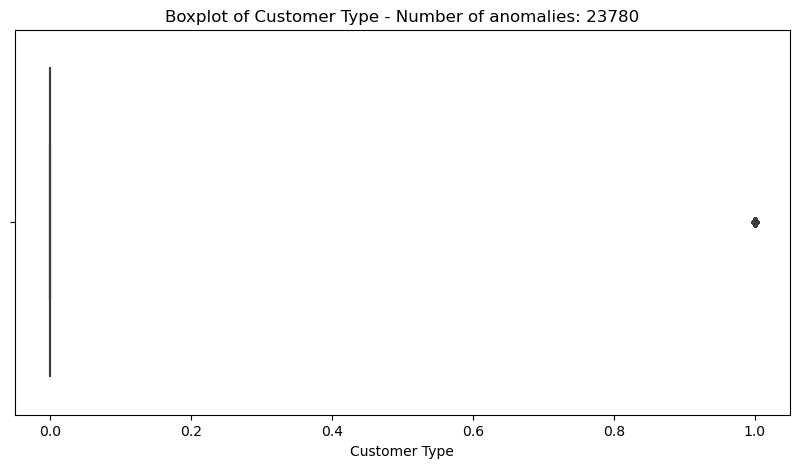

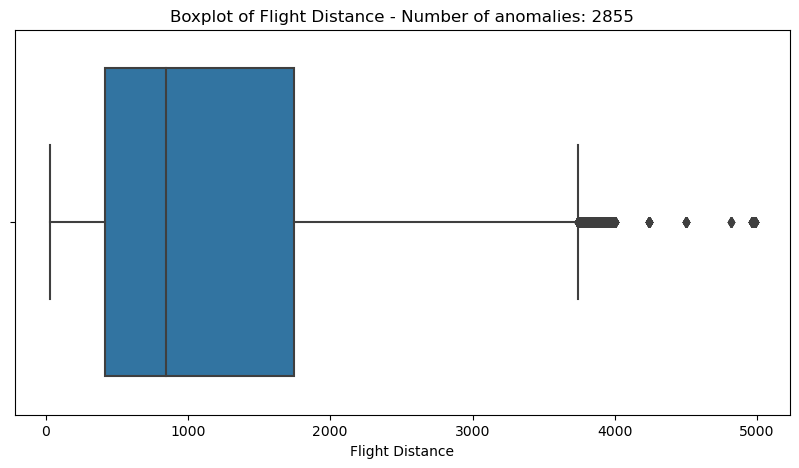

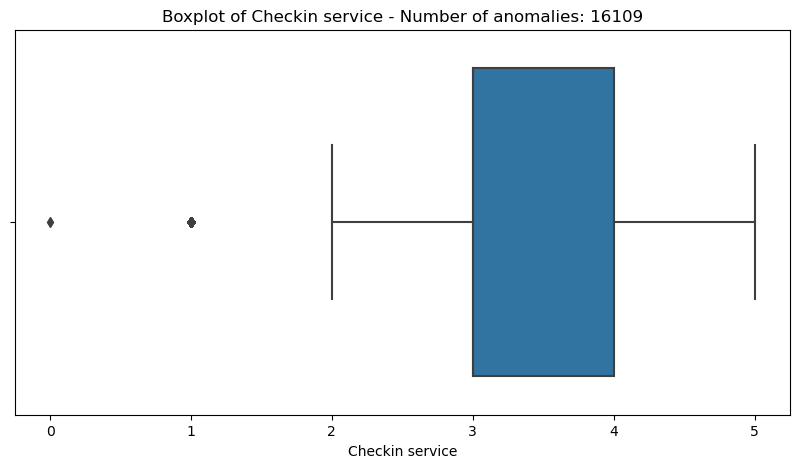

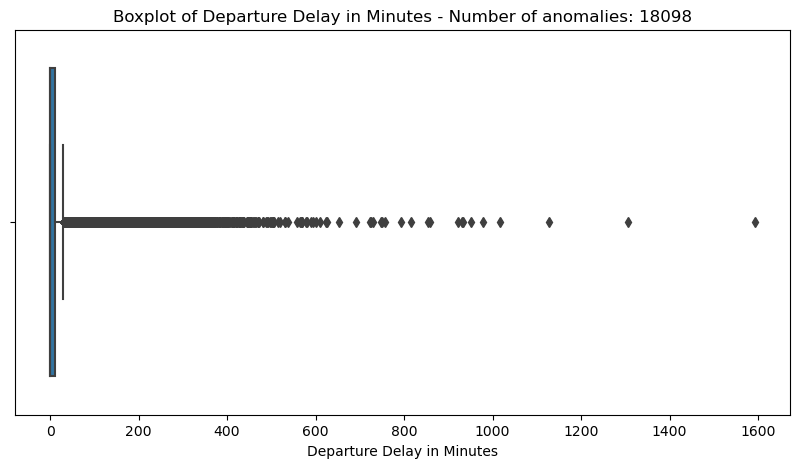

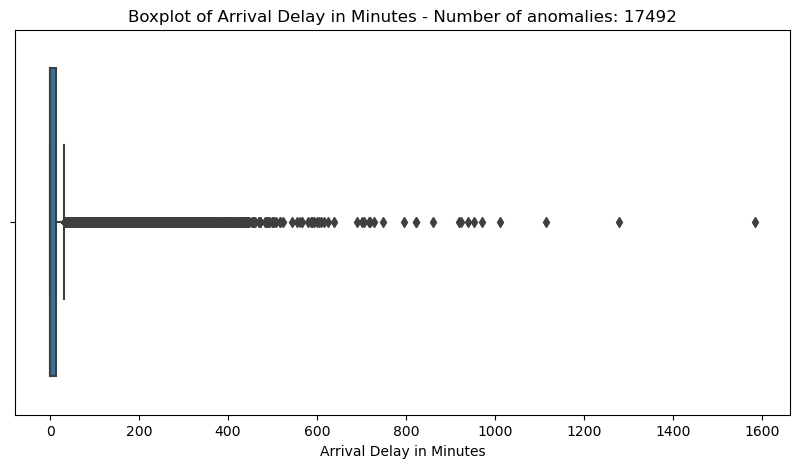

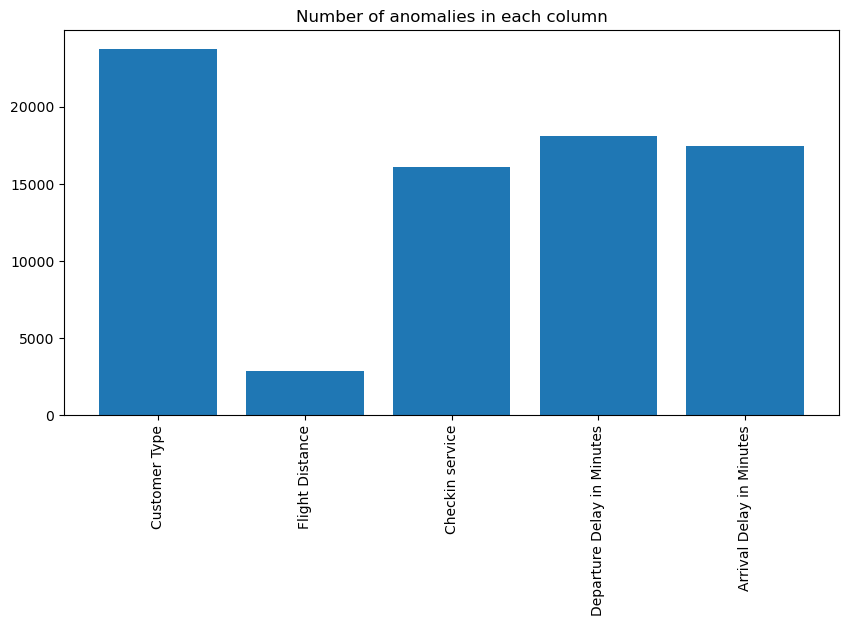

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store the count of anomalies for each column
anomalies_dict = {}

# Iterate over numeric columns only
for column in df.select_dtypes(include=[np.number]).columns:
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define criteria for a value to be considered an outlier
    outlier_condition = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    
    # Calculate the number of outliers and add it to the dictionary
    anomalies_dict[column] = df[outlier_condition].shape[0]

    # If anomalies count is greater than zero, draw a boxplot
    if anomalies_dict[column] > 0:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot of {column} - Number of anomalies: {anomalies_dict[column]}")
        plt.show()

# Filter the dictionary to only include columns with anomalies > 0
anomalies_dict = {column: count for column, count in anomalies_dict.items() if count > 0}

# If there are columns with anomalies, create a bar chart to show the number of anomalies in each column
if anomalies_dict:
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(anomalies_dict)), list(anomalies_dict.values()), align='center')
    plt.xticks(range(len(anomalies_dict)), list(anomalies_dict.keys()), rotation=90)
    plt.title("Number of anomalies in each column")
    plt.show()
else:
    print("No columns with anomalies found.")


There are a large amount of anomalies in the categories of Customer Types, Flight Distance, Checkin Service, Departure and Arrival delays in minutes. Now we must look  more in-depth with these catergories in order to find out why. To do this we use an isolation forrest. 

 1    123386
-1      6494
Name: anomaly, dtype: int64


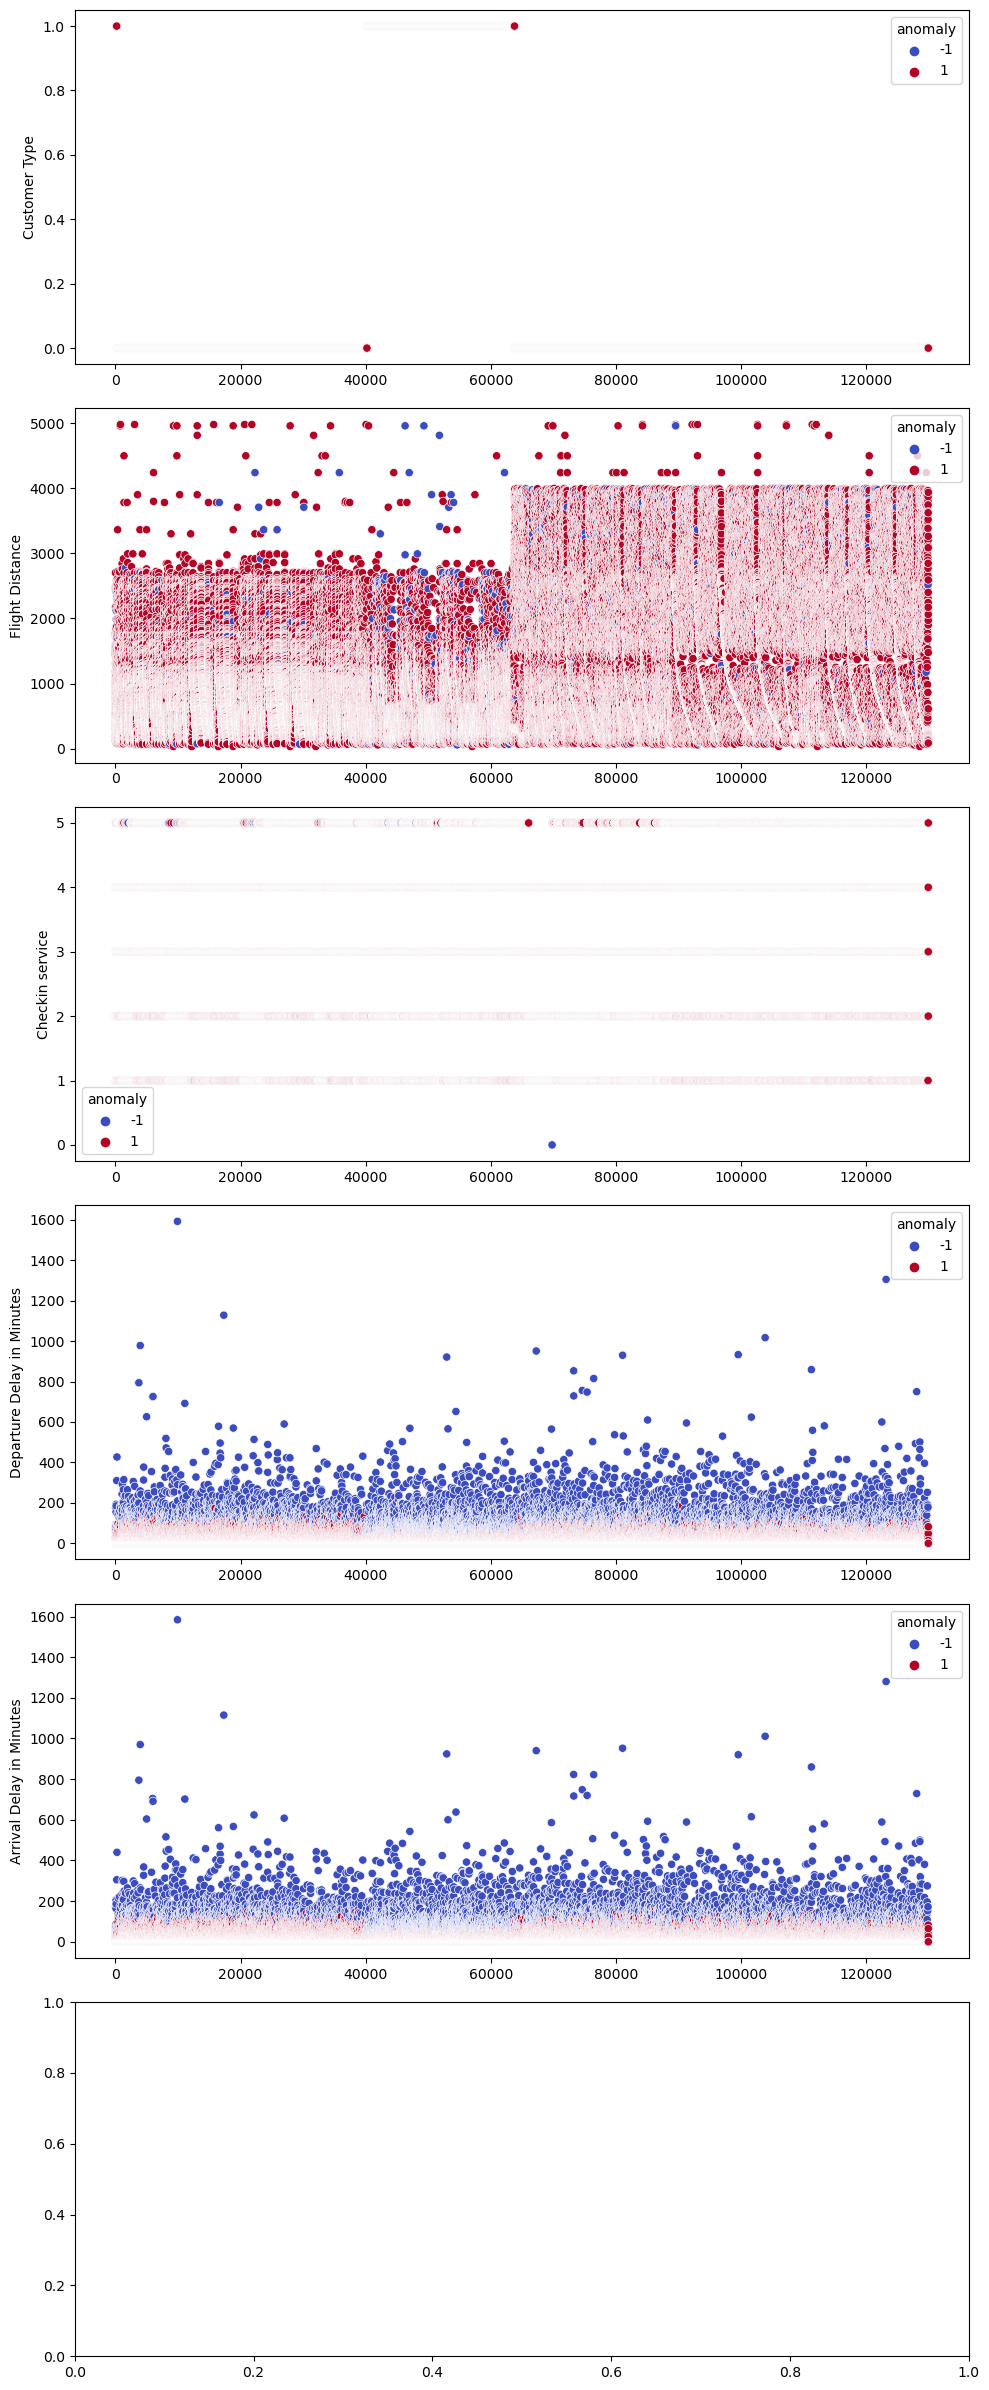

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Select only the required columns
selected_columns = ["Customer Type", "Flight Distance", "Checkin service", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
df_selected = df[selected_columns]

# Fitting the IsolationForest model
model = IsolationForest(contamination=0.05)
model.fit(df_selected)

# Creating a new column to store the anomaly prediction 
df_selected['anomaly'] = model.predict(df_selected)

# Find the number of anomalies and normal points here points classified -1 are anomalous
print(df_selected['anomaly'].value_counts())

# Visualizing the anomaly scores for each feature
fig, axs = plt.subplots(nrows=df_selected.shape[1], figsize=(10, 4 * df_selected.shape[1]))
for i, column in enumerate(df_selected.columns[:-1]):
    sns.scatterplot(x=range(df_selected.shape[0]), y=df_selected[column], hue=df_selected['anomaly'], palette='coolwarm', ax=axs[i])
plt.tight_layout()
plt.show()

For Customer Type:
There are no anomalies to be seen, the values are contained in the range [0,1]

For Flight Distance:
The anomalies show trhat within certain ranges of the dataset cointains values that differ from the norm of that range, however overall they are within the expected value range.

For Checkin Service:
There is a single anomaly describing a customer rating the Checkin Service as a 0 when compared to all other passengers that gave it a score on the range of [1,5]

For Departure Delay in Minutes and Arrival Delay in Minutes:
As shown when above a certain amount of time (approximently 125-150 Minutes) the delays that result are rare and become anomalies in the data set.


That finishes the Data Cleaning, next we move onto Data Exploration. I will use Matplotlib and seaborn to make a histograms and other graphs from the cleaned dataframe using their visual statistical graphs.

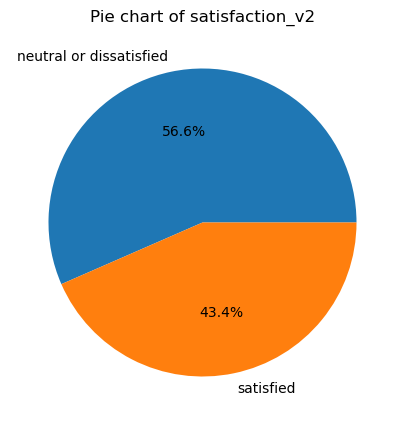

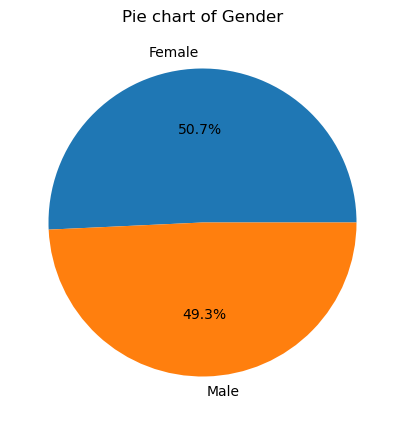

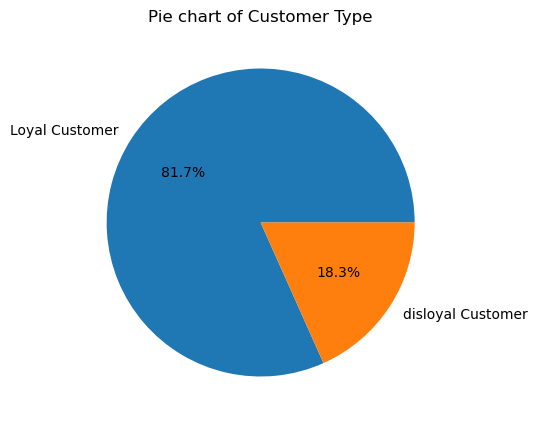

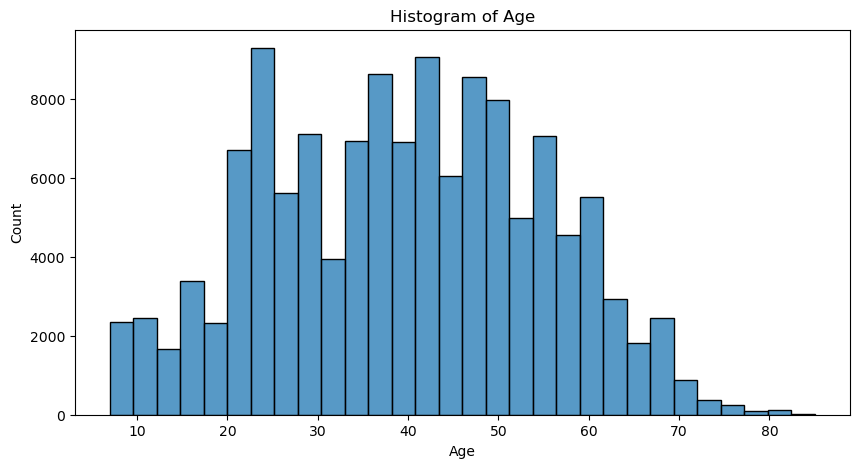

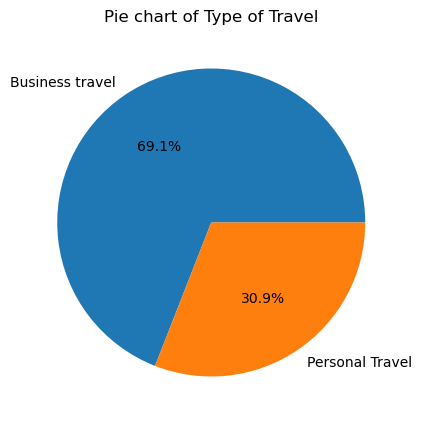

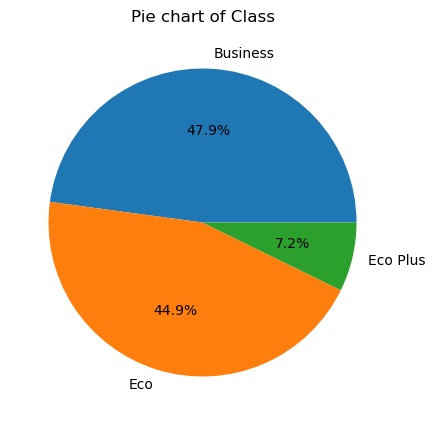

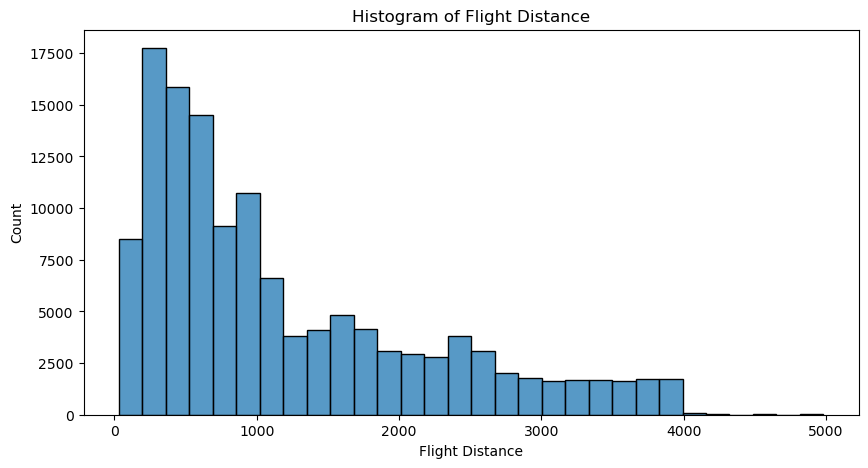

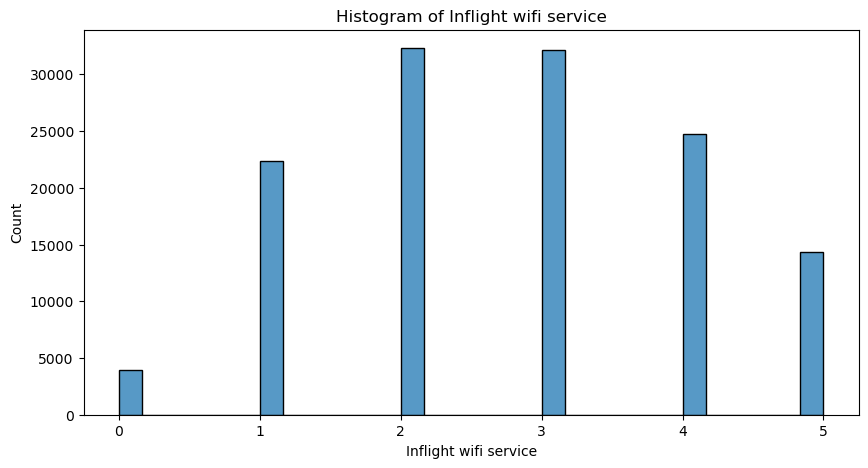

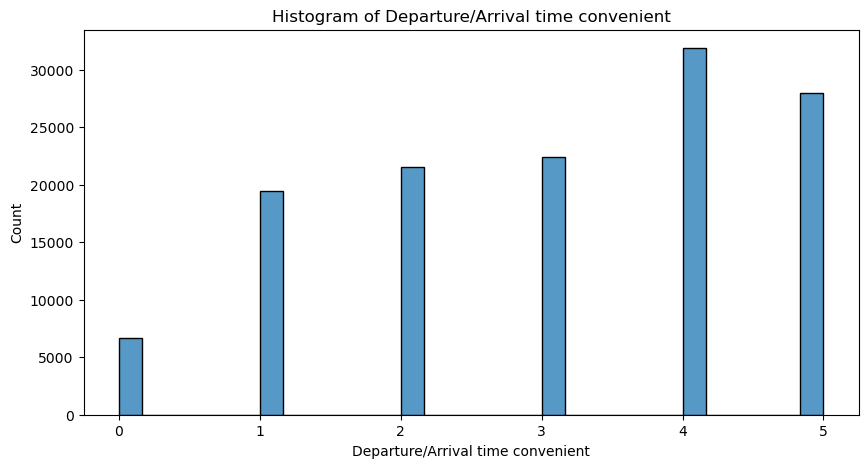

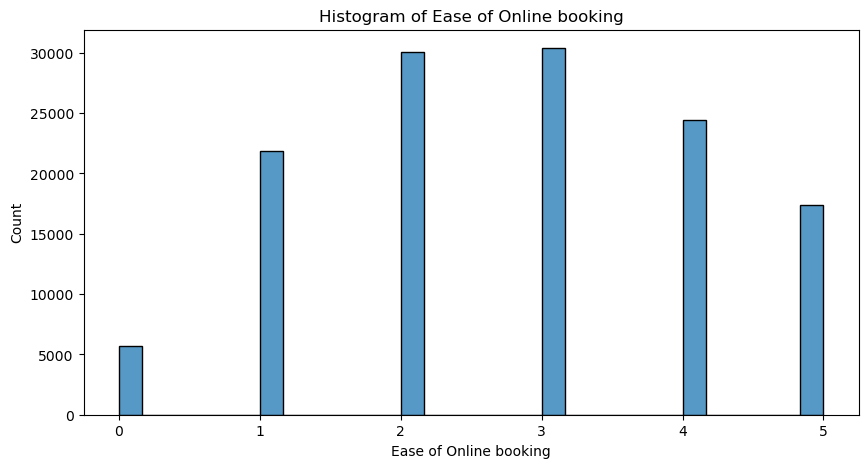

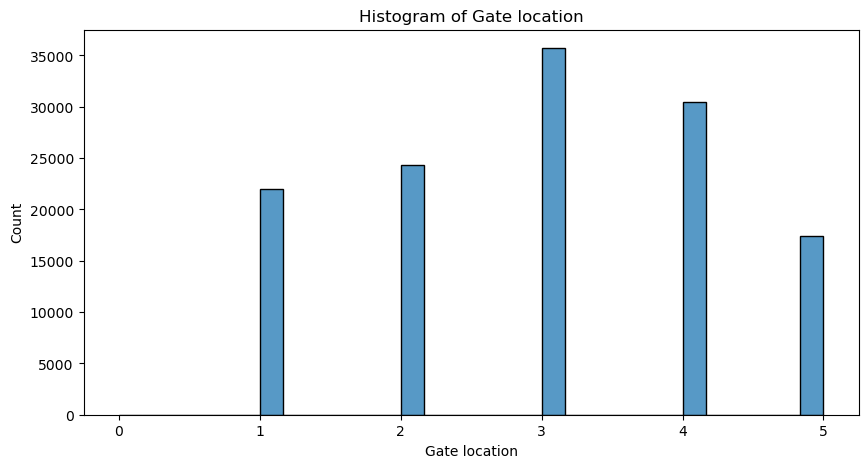

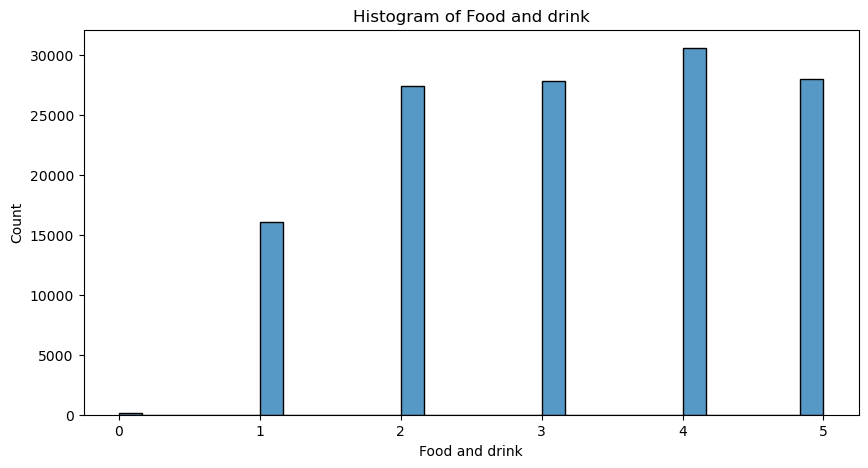

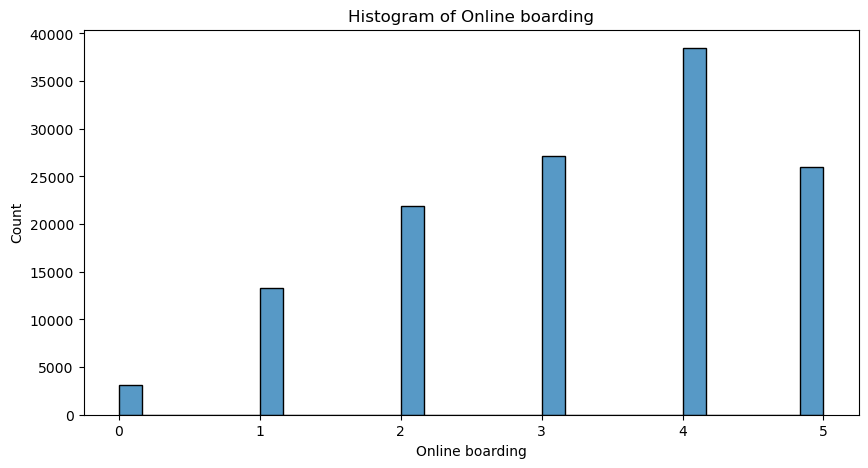

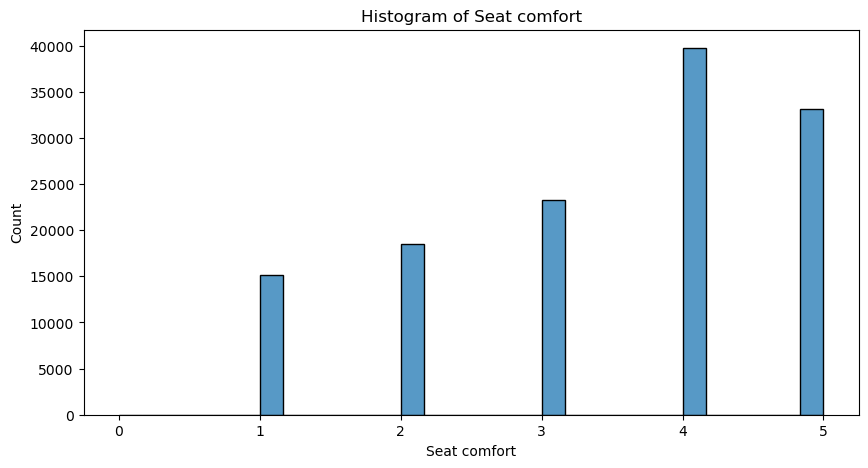

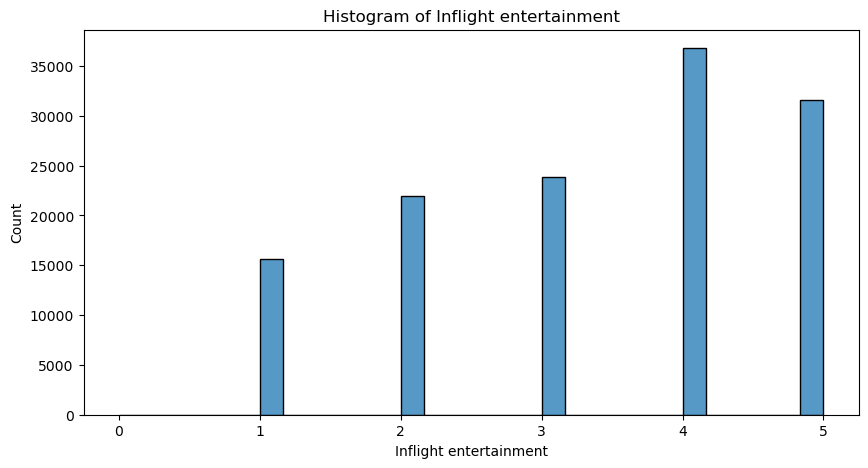

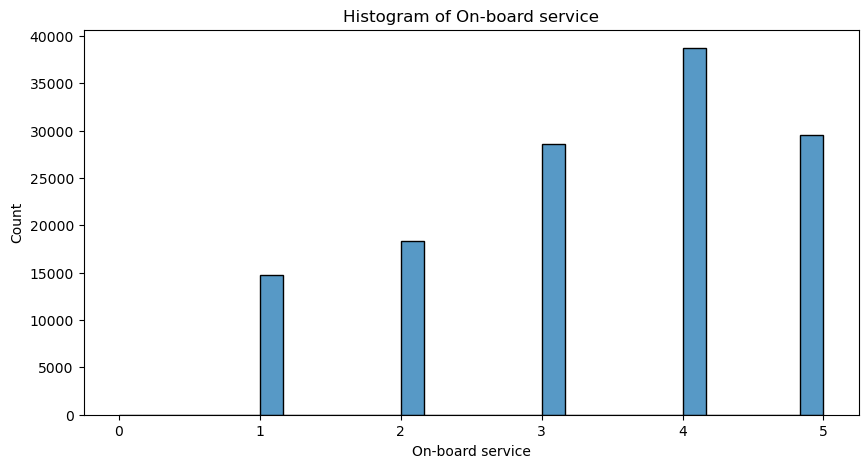

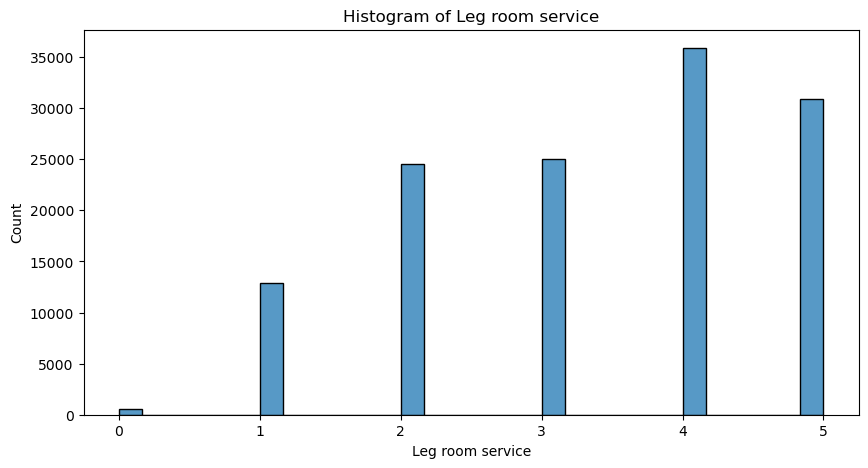

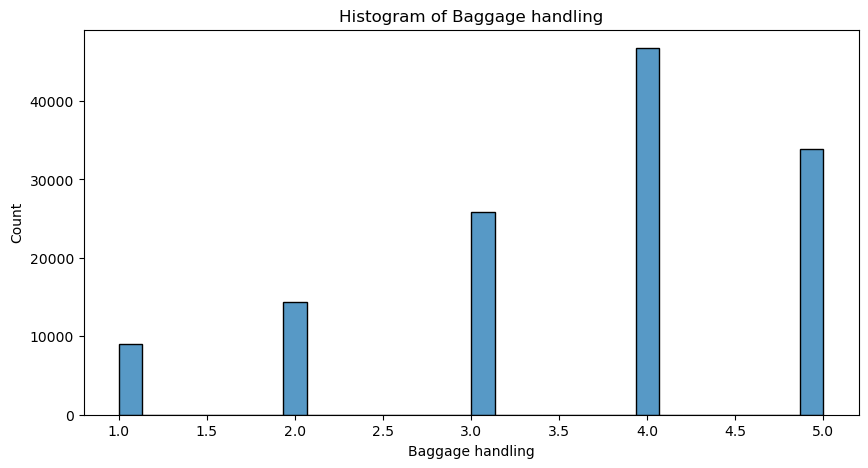

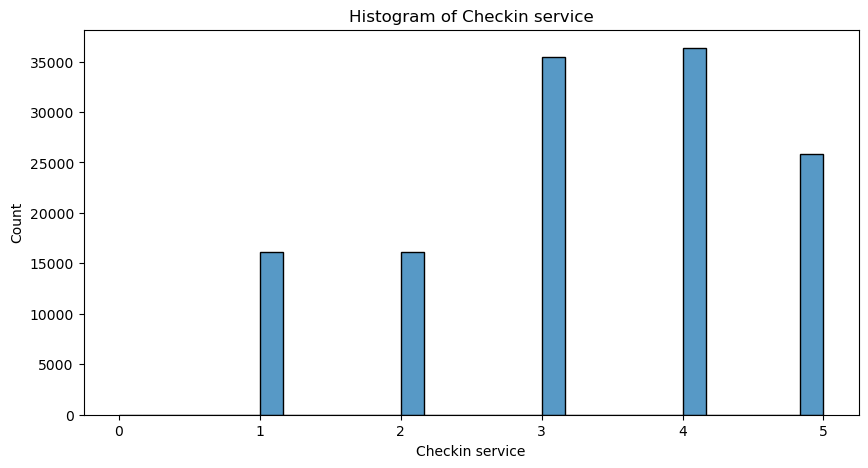

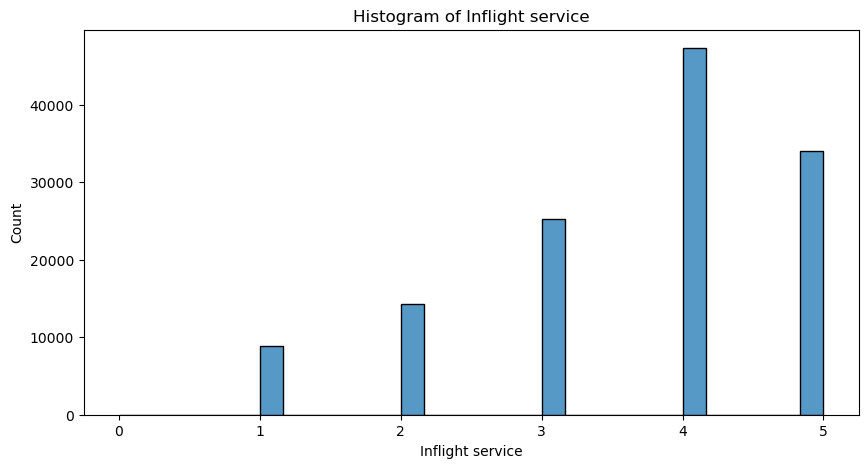

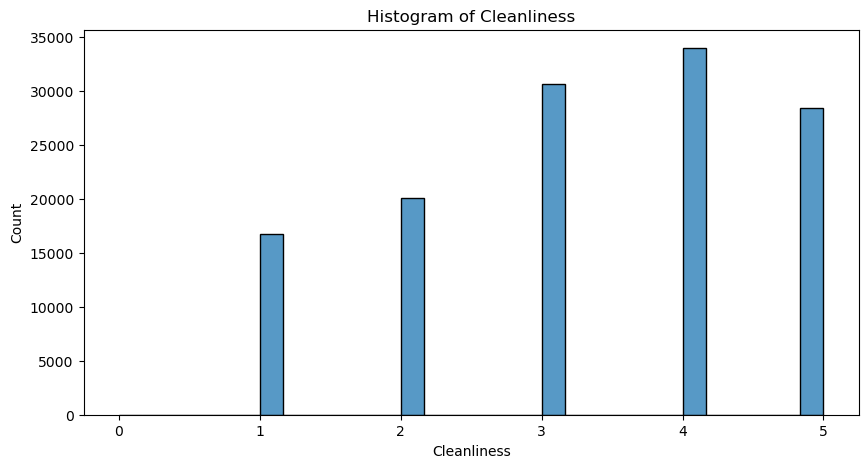

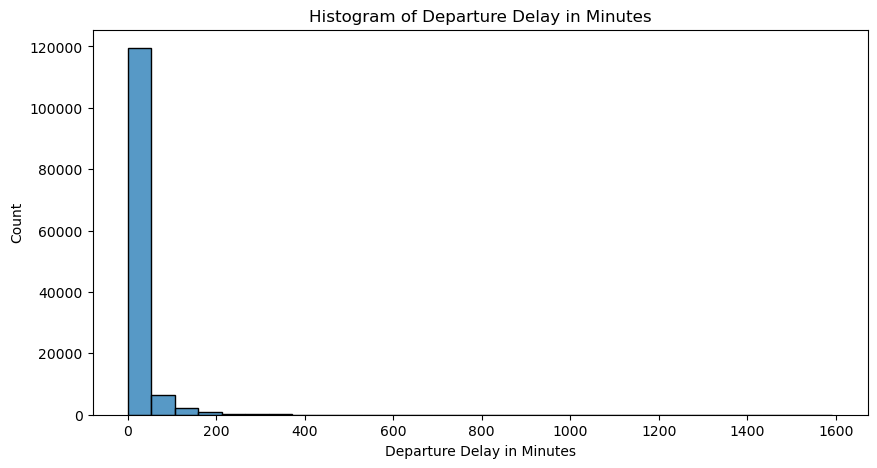

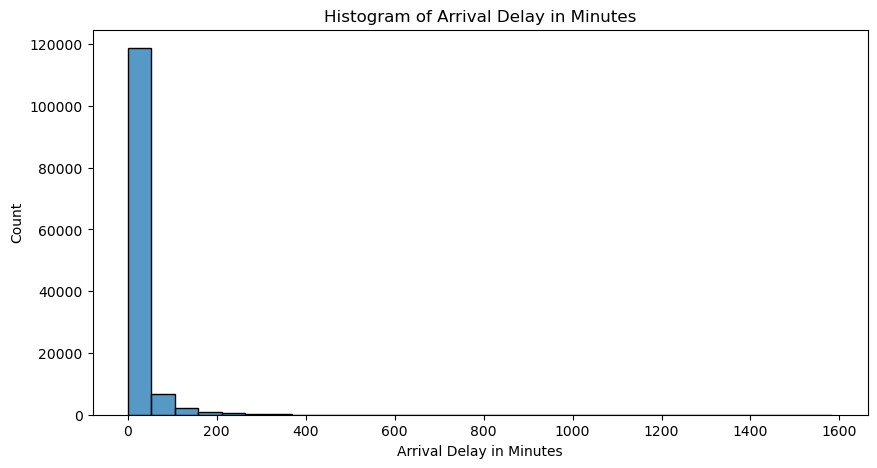

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure columns are numeric
df = df.apply(pd.to_numeric, errors='ignore')


# List of columns to make a pie chart
pie_chart_columns = ['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

# Univariate Analysis
# Iterate over each column in the original DataFrame
for column in df_original.columns:
    # For columns in pie_chart_columns, make a pie chart
    if column in pie_chart_columns:
        # Calculate percentage of each unique value
        value_counts = df_original[column].value_counts(normalize=True) * 100
        
        # Create a pie chart
        plt.figure(figsize=(10, 5))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
        plt.title(f"Pie chart of {column}")
        plt.show()
    else:
        #print(f"\nColumn: {column}")
        
        # Print descriptive statistics
        #print(df[column].describe())
        
        # Draw a histogram
        plt.figure(figsize=(10, 5))
        sns.histplot(df_original[column], kde=False, bins=30)
        plt.title(f"Histogram of {column}")
        plt.show()

- As seen from the satisfaction pie chart, there are more disatisfied customers than satisfied customers in the data set ([56.6%] Disatisfied vs [43.4%] Satisfied)
- The number of Passengers are almost evenly split between Females and Males [50.7%, 49.3%]
- Most passengers are loyal customers [81.7%]
- As seen by the Histogram of Age, most customers are between the ages of 20 through 60 years of age. There are few young passengers [<20] and a very few amount of older passengers[>60]
- Pie chart of type of travel shows Business Travel [69.1%] is greater compared to personal travel [30.9%]
- Pie chart of Class contrasts the the type of travel as both Eco [44.9%] and Eco Plus [7.2%] are in combination greater than the amount of business class [47.9%]
- Histogram of flight distance shows a greater amount of travel when the distance is smaller than 1000
- A majority of individuals rate (Inflight wifi service, Departure/Arrival time, Ease of Online booking, Gate location, Food and drink, Online boarding, Inflight entertainment, On-board service, Leg room service & Cleanliness) a score of [2-4] on a scale of [1-5]. This is curious as so many categories are scored similarily. This could be from customers taking the survey not wanting to be too negative [0-1] or overly positive [5].
- The scoring for Seat comfort shows higher scoring of [2-5]
- The scoring for Baggage handling shows higher scoring of [3-5]
- Checkin service is closly scored between [3-4]
- The scoring for Inflight service shows higher scoring of [3-5] 
- Most departure delays end before [<50] minutes while arrivals are mostly delayed by the same amount of time

Now we must find where the disatisfaction mostly comes from as it represents more than half of the customers. We compare Satisfaction vs Disatisfaction per each other category. We must bin large ranges in order to display the results properly.

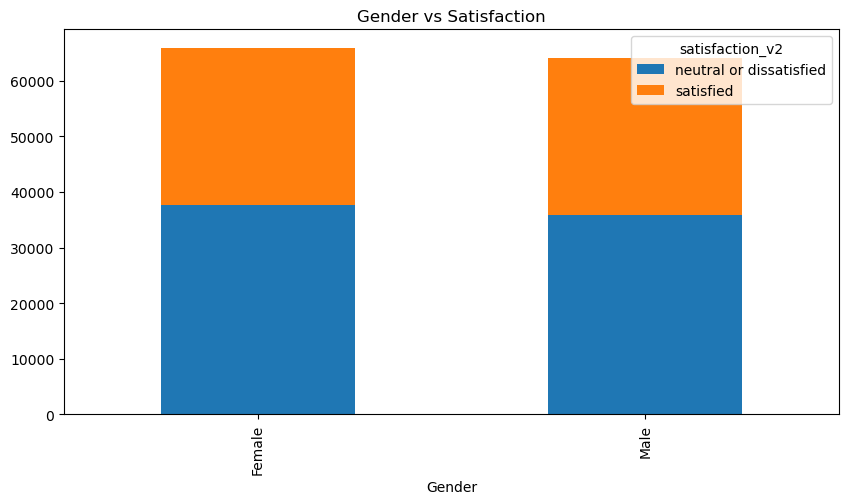

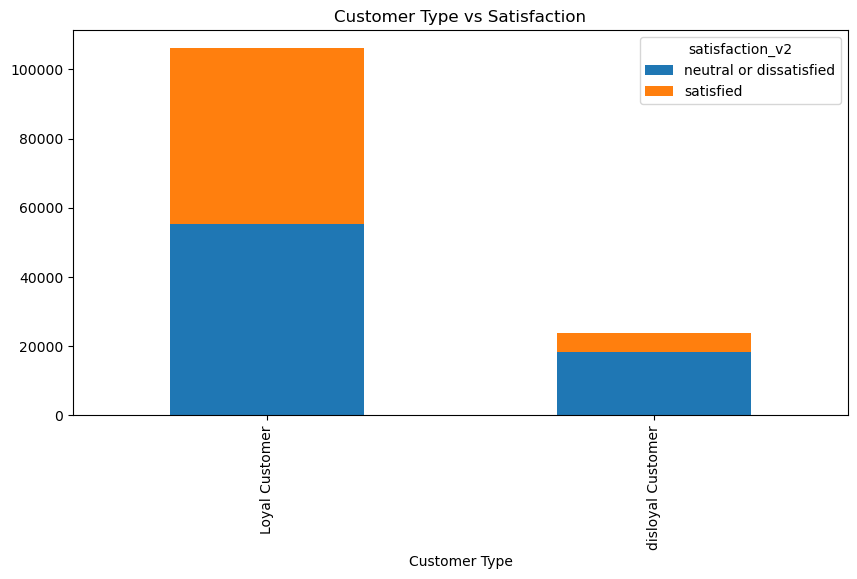

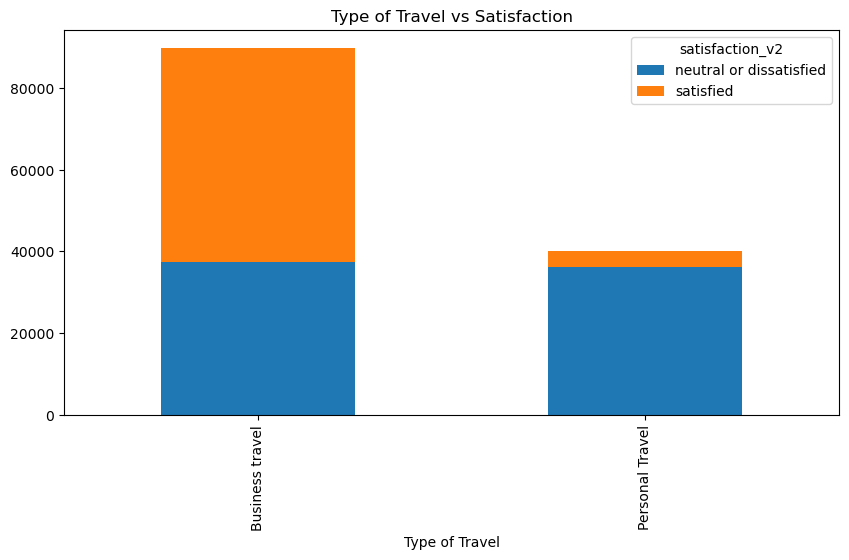

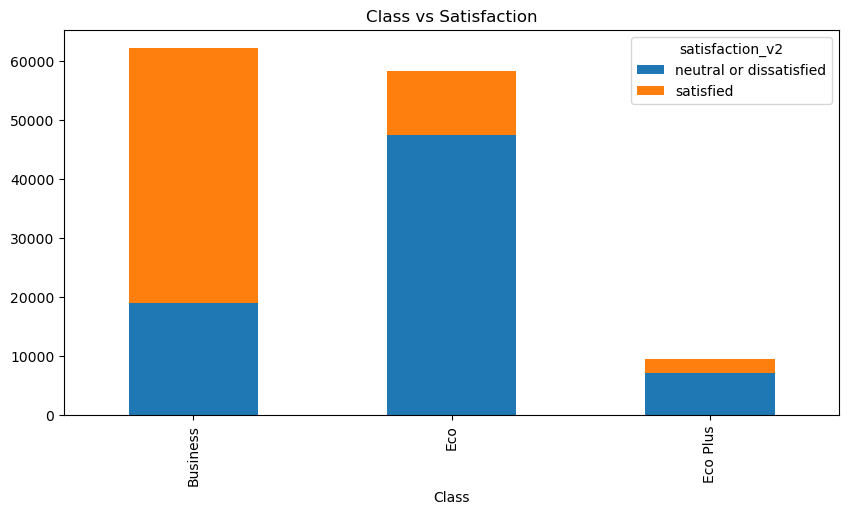

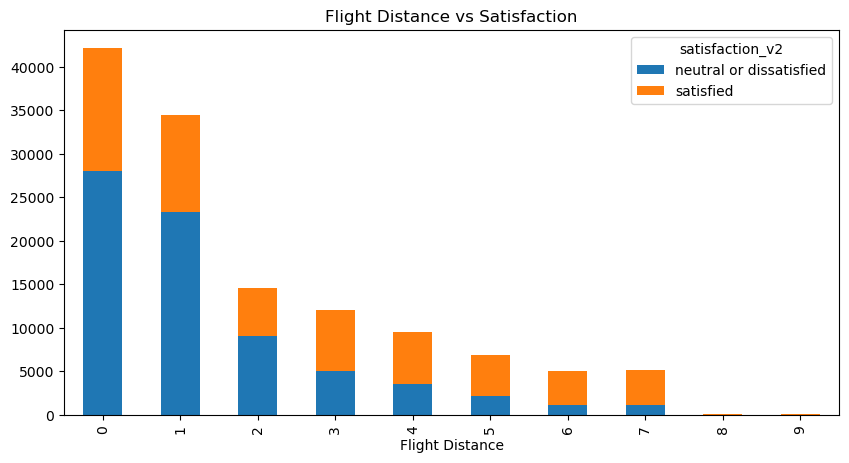

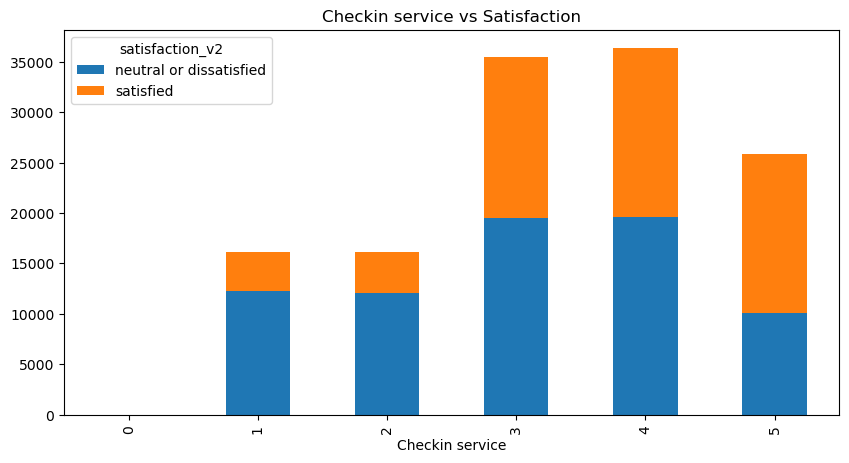

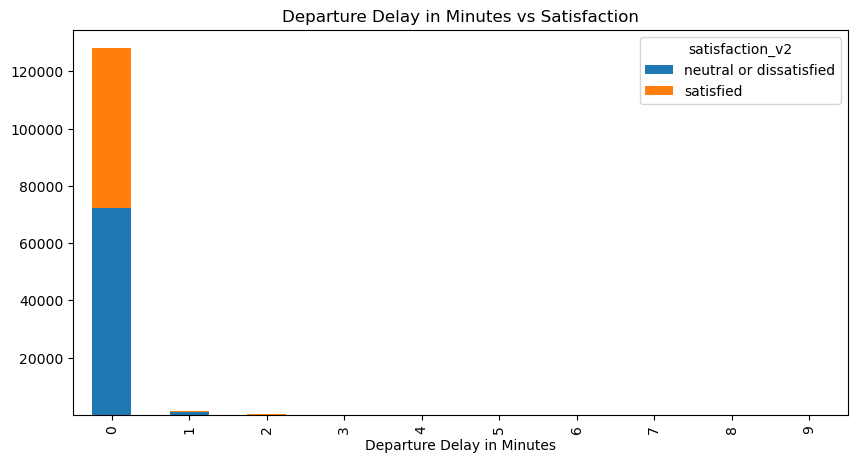

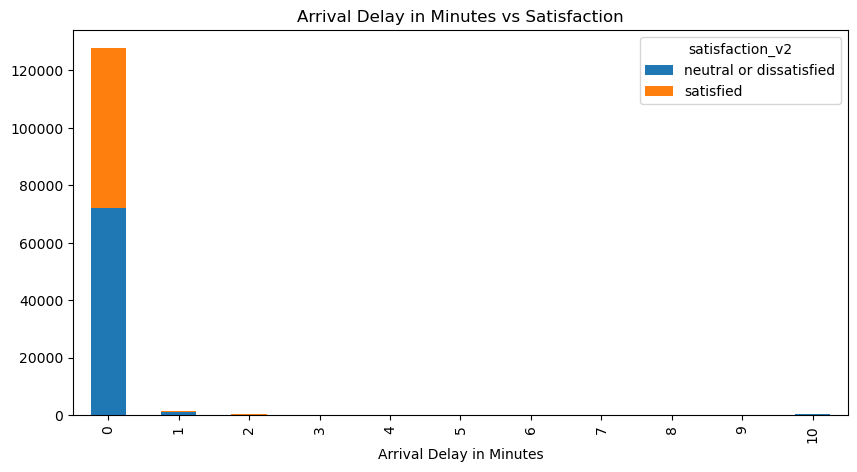

In [ ]:
# List of columns to make a pie chart
pie_chart_columns = ['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

# Columns to compare with satisfaction
compare_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

for column in compare_columns:
    # If the column is numeric and has a large range, bin the values
    if df_original[column].dtype != np.object and df_original[column].nunique() > 10:
        df_original[column] = pd.cut(df_original[column], bins=10)
        le.fit(df_original[column])
        df_original[column] = le.transform(df_original[column])
    
    # Create cross-tabulation between satisfaction_v2 and the current column
    cross_tab = pd.crosstab(df_original[column], df_original['satisfaction_v2'])

    # Create a stacked bar plot
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f"{column} vs Satisfaction")
    plt.show()

As show most categories have an even distribution of Satisfied customers vs Disatisified (when compared to the values, such as 1 having more disatisfied and a 5 having more satisfied), however when looking at Type of travel and Classes this isnt the case. A majority of the Eco class (Eco [44.9%] and Eco Plus [7.2%]) that make up personal travel show disatisfaction in higher numbers as compared to the satisfied customers. This is contrasted in business class [47.9%] and business travel as most show satisified results.
- It can be concluded that most disatisfaction is coming mostly from a Eco/Eco Plus group of customers traveling for personal reasons. Business class (and business travel) travels in higher comfort and luxury as compared to Eco and Eco Plus resulting in their higher satisfaction. 

To find a reason for the amount of disatisfaction in the Eco/Eco Plus Class and the Personal travelers we must compare the four groups
- 1) Personal travelers and the Eco/Eco Plus Class 
- 2) Business travelers and the Business Class  
- 3) Business travelers and the Eco/Eco Plus Class 
- 4) Personal travelers and the Business Class 

In [ ]:
# Total number of rows
print(f"Number of rows: {df.shape[0]}")
# Filter rows where 'Type of Travel' is 'Personal' and 'Class' is 'Eco' & 'Eco Plus'
filtered1_df = df_original[(df['Type of Travel'] == 1) & (df['Class'].isin([1,2]))]
print(f"Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Eco' & 'Eco Plus': {filtered1_df.shape[0]}")
# Filter rows where 'Type of Travel' is 'Business' and 'Class' is 'Business'
filtered2_df = df_original[(df['Type of Travel'] == 0) & (df['Class'].isin([0]))]
print(f"Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Business': {filtered2_df.shape[0]}")
# Filter rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' & 'Eco Plus'
filtered3_df = df_original[(df['Type of Travel'] == 0) & (df['Class'].isin([1,2]))]
print(f"Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' & 'Eco Plus': {filtered3_df.shape[0]}")
# Filter rows where 'Type of Travel' is 'Personal' and 'Class' is 'Business'
filtered4_df = df_original[(df['Type of Travel'] == 1) & (df['Class'].isin([0]))]
print(f"Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Business': {filtered4_df.shape[0]}")

Number of rows: 129880
Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Eco' & 'Eco Plus': 37514
Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Business': 59487
Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' & 'Eco Plus': 30206
Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Business': 2673


Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Eco' or 'Eco Plus': 37514


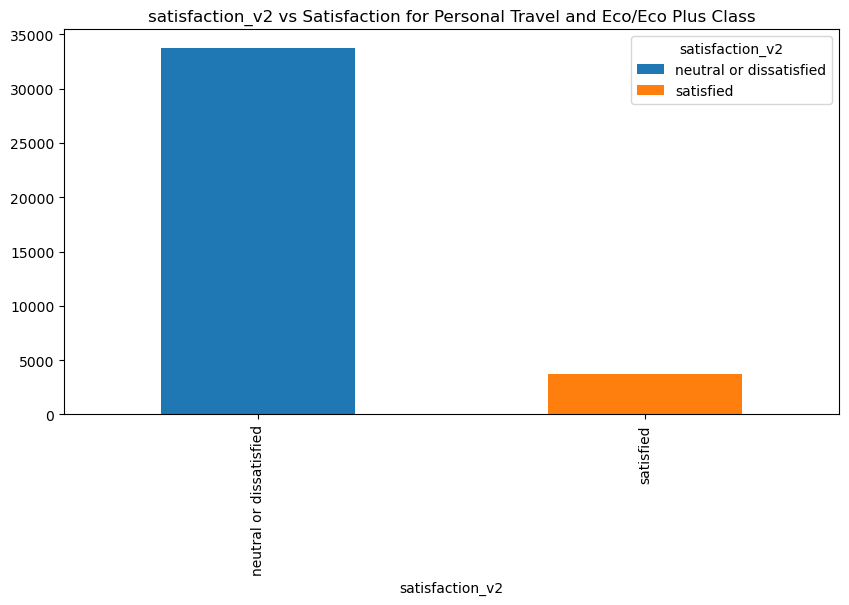

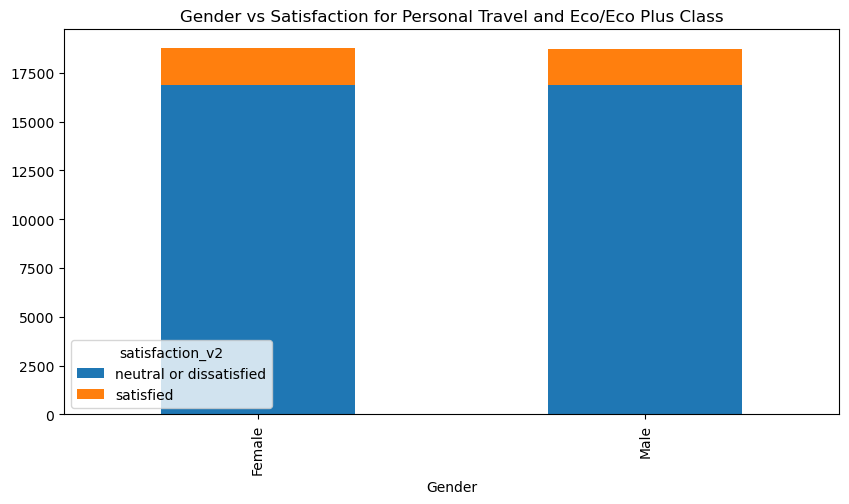

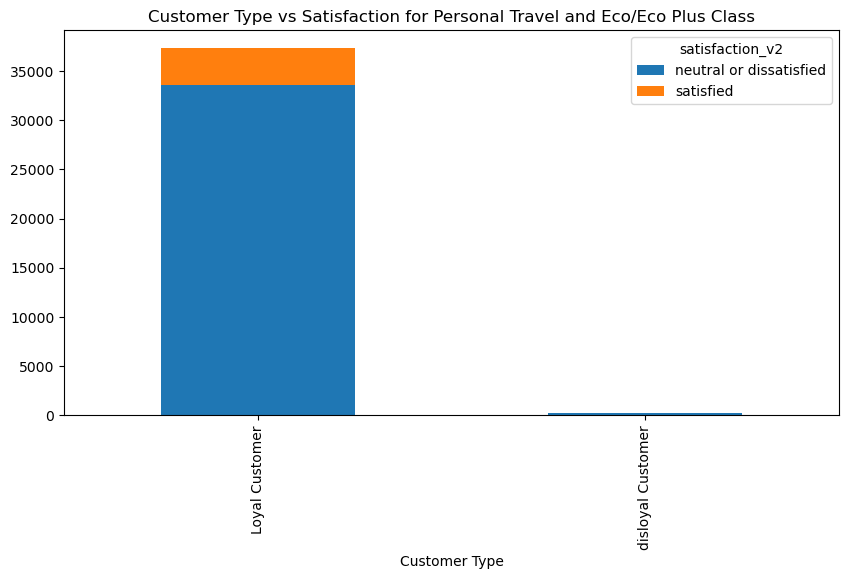

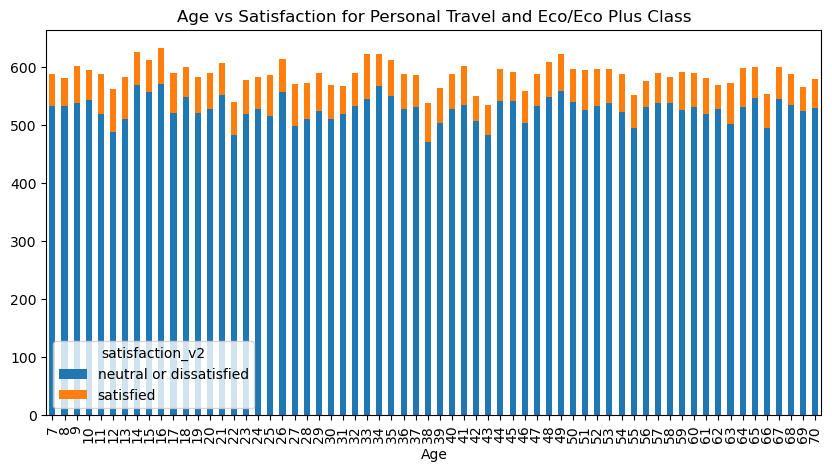

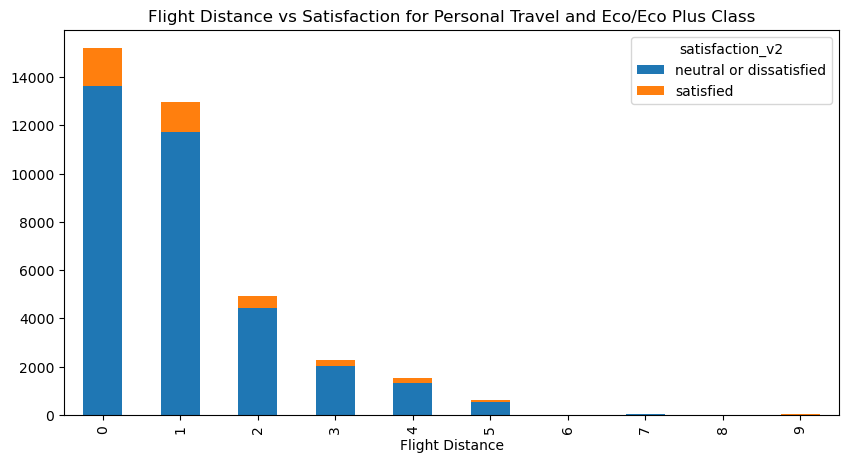

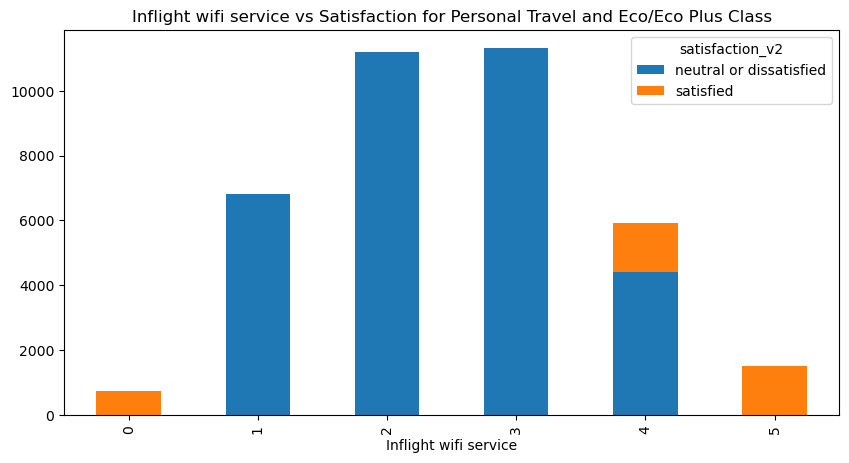

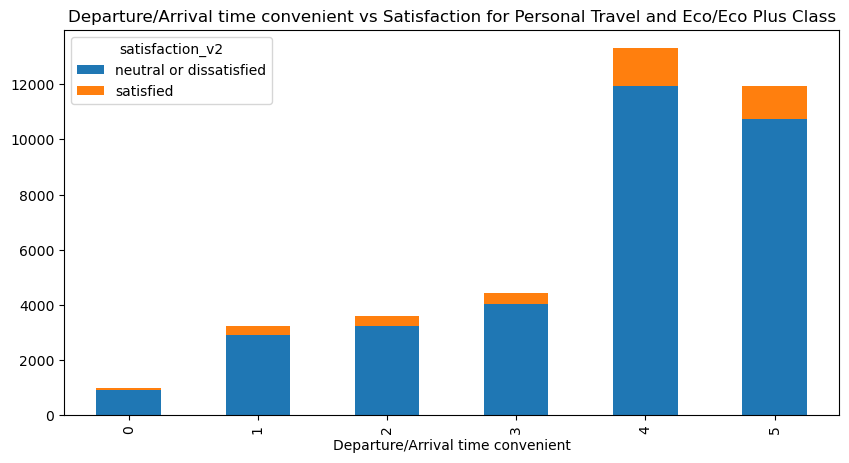

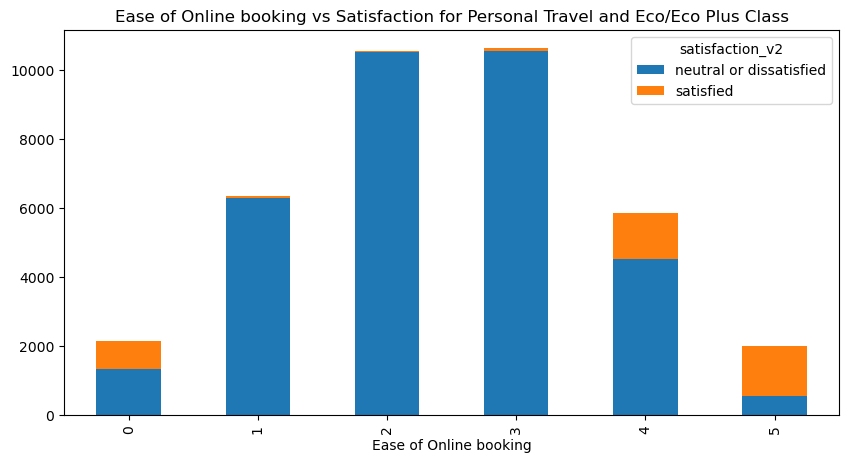

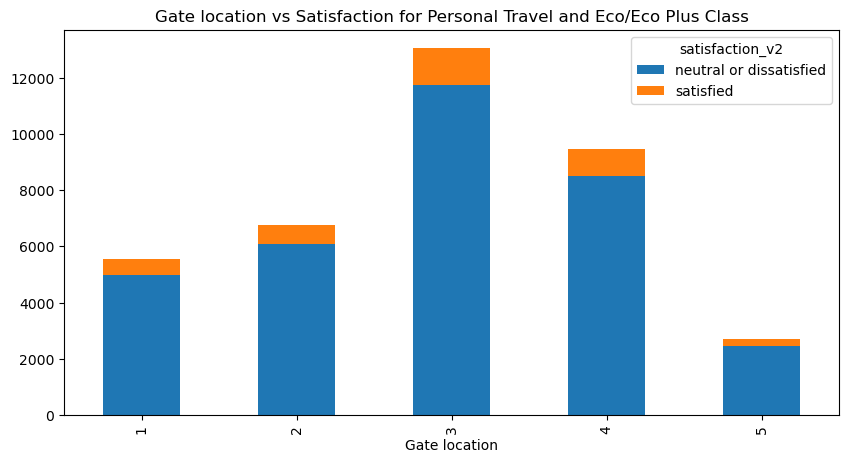

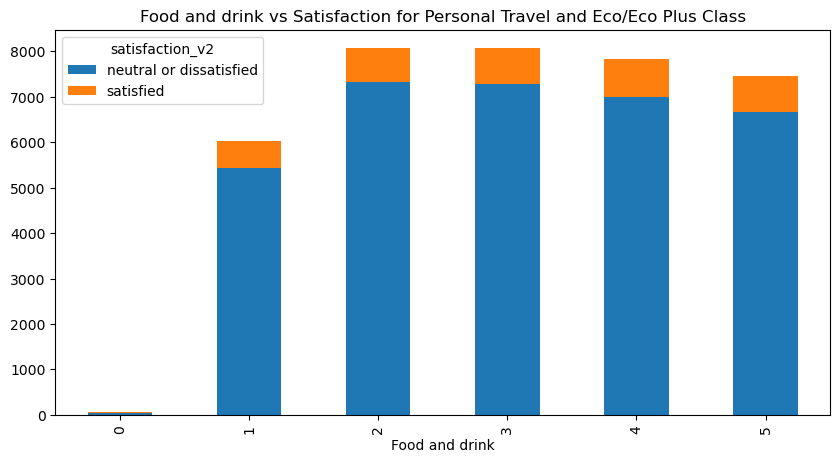

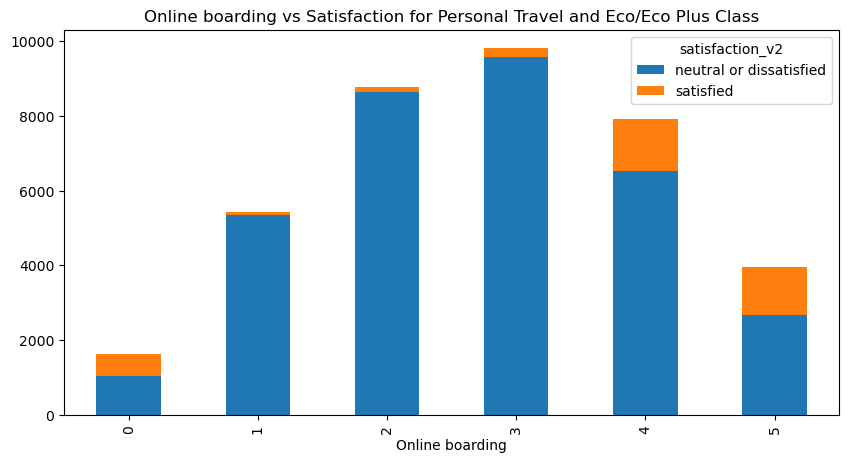

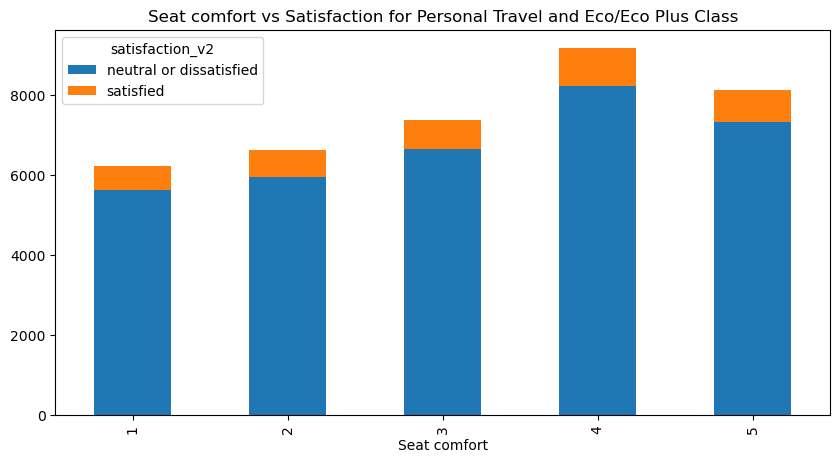

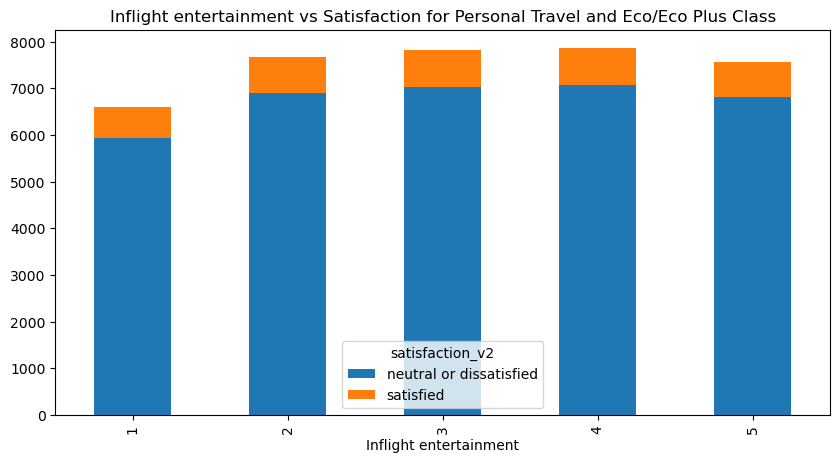

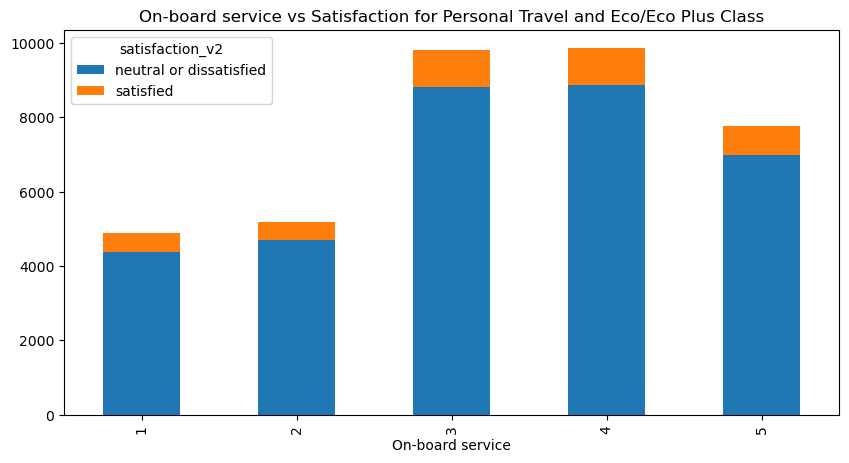

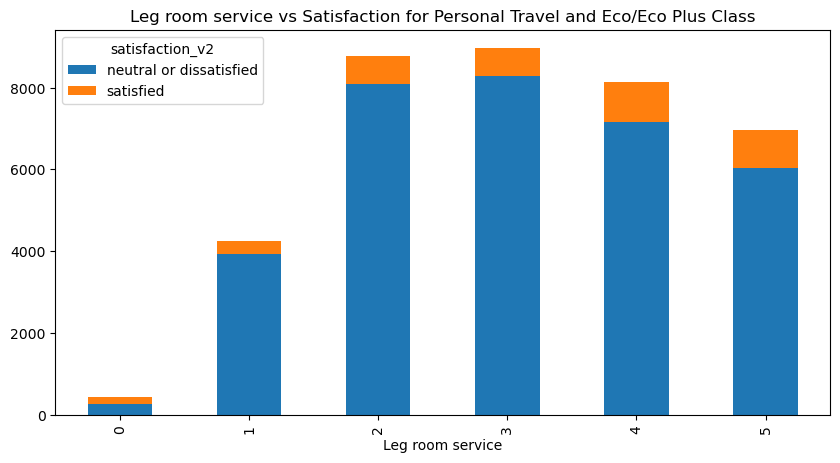

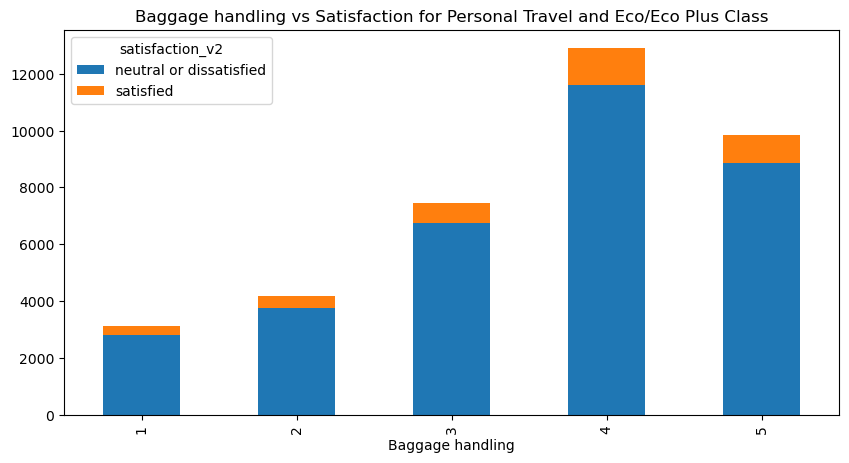

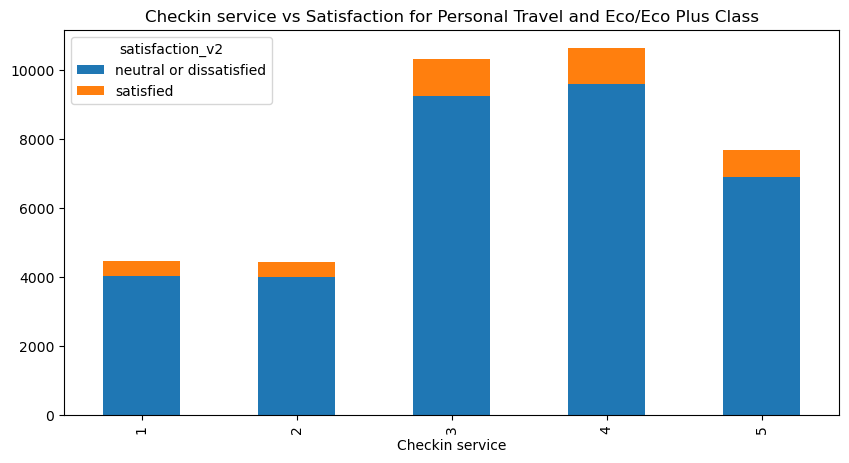

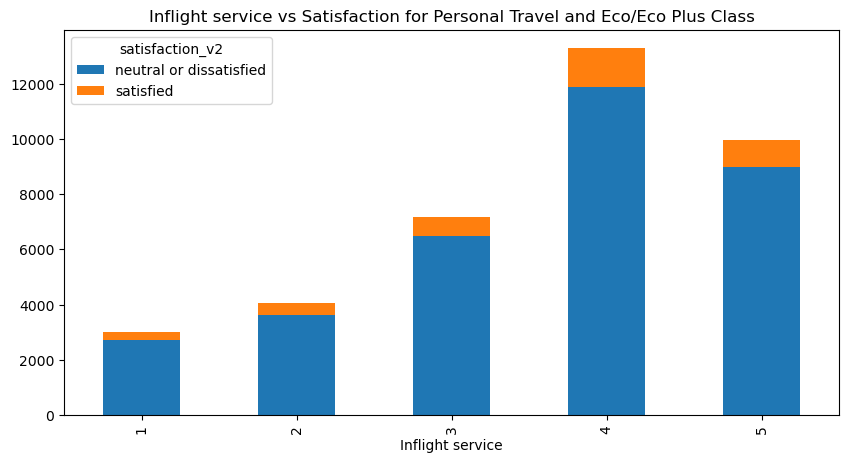

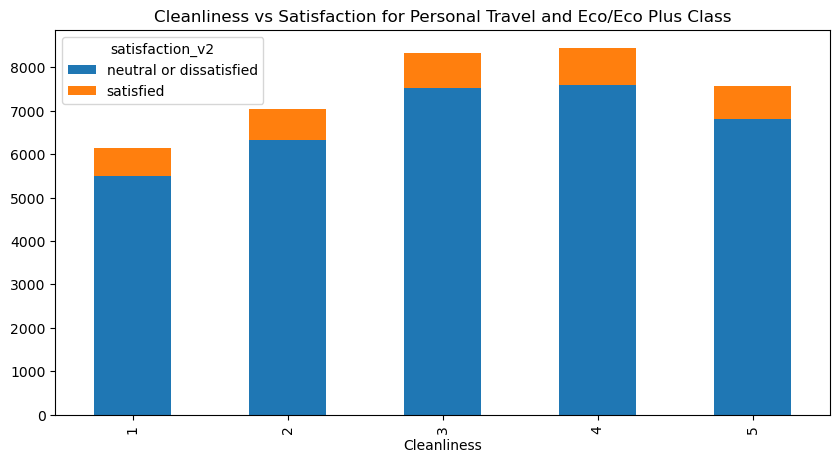

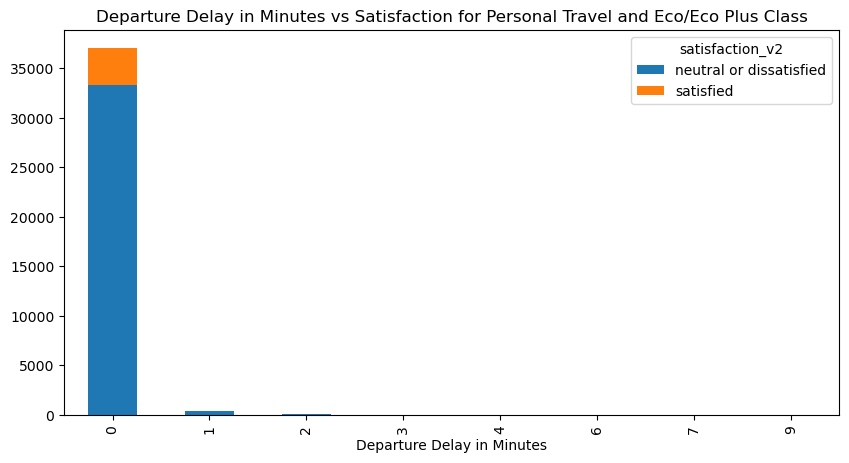

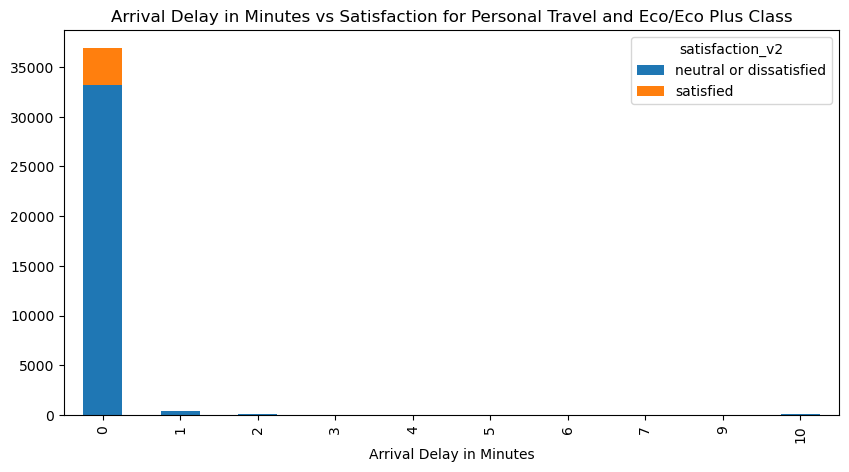

In [ ]:
# Filter rows where 'Type of Travel' is 'Personal' and 'Class' is 'Eco' or 'Eco Plus'
print(f"Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Eco' or 'Eco Plus': {filtered1_df.shape[0]}")
# Iterate over each column in the filtered DataFrame
for column in filtered1_df.columns:
    # Exclude 'Type of Travel' and 'Class' from the comparison
    if column not in ['Type of Travel', 'Class']:
        # Create cross-tabulation between the current column and 'satisfaction_v2'
        cross_tab = pd.crosstab(filtered1_df[column], filtered1_df['satisfaction_v2'])

        # Create a stacked bar plot
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.title(f"{column} vs Satisfaction for Personal Travel and Eco/Eco Plus Class")
        plt.show()

When looking at strictly the Peronal traveling Eco/Eco Plus calss there is a overwhelming amount of disatisfaction amongst this group no matter what category is looked at. It can be concluded that their experience no matter how highly they rate a category will result in a disatisfactory mark. Next lets look at the business travel and class group.

Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Business': 59487


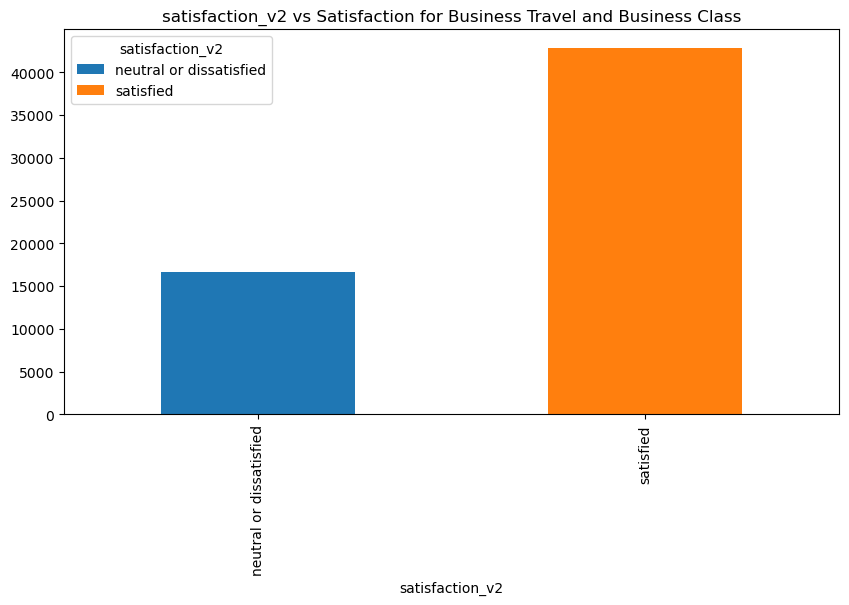

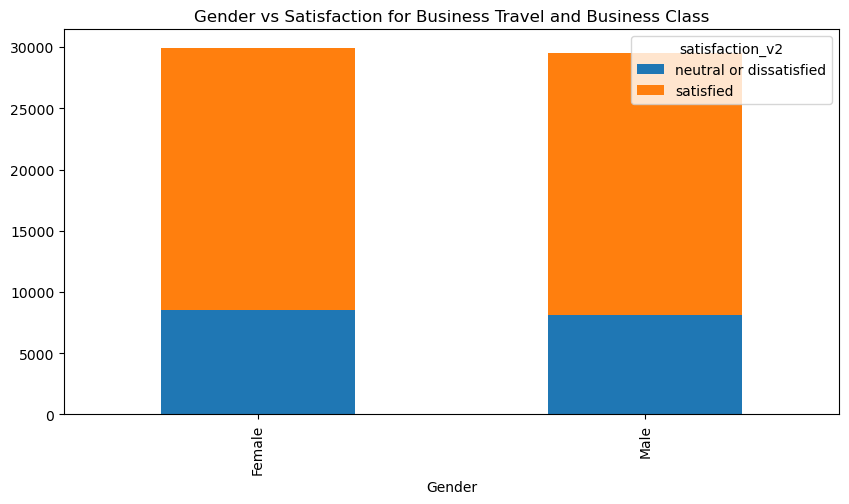

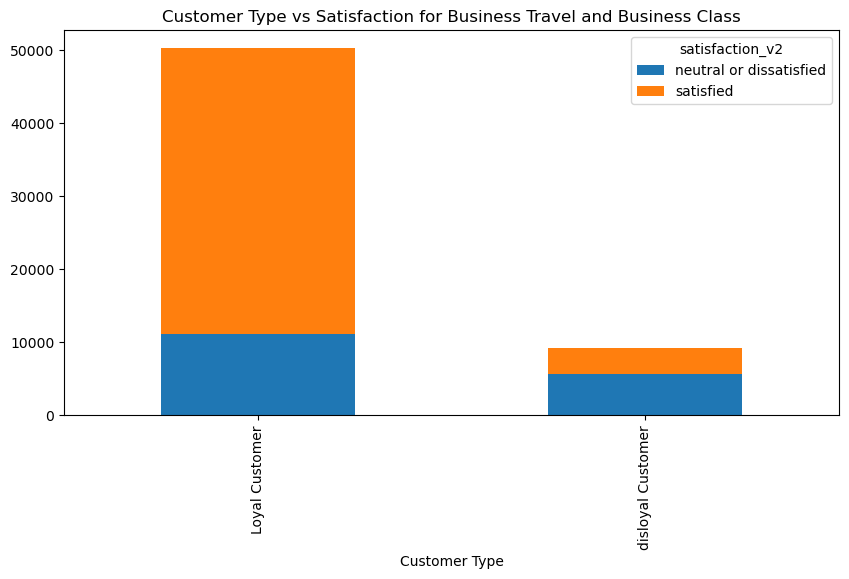

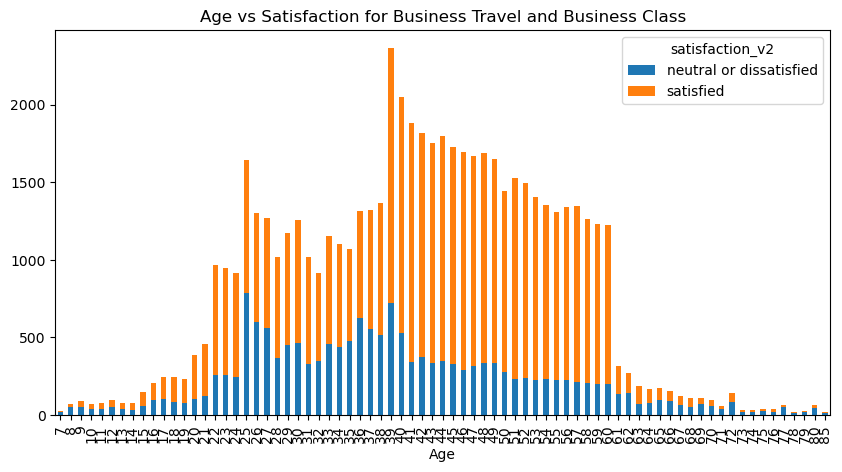

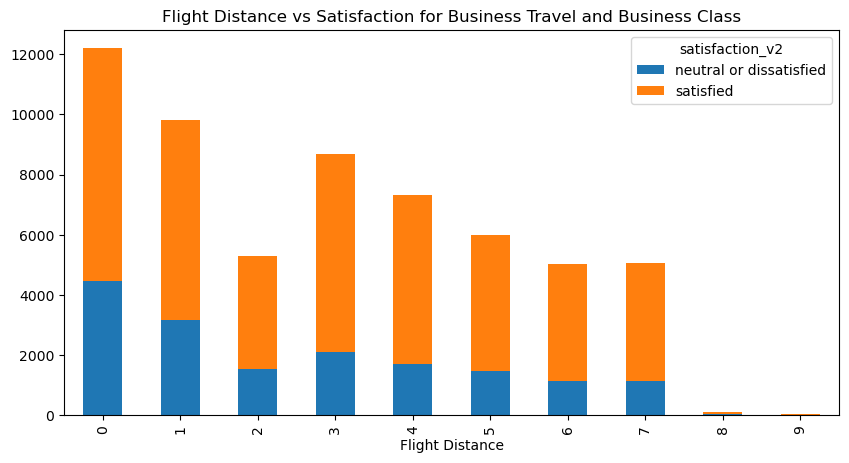

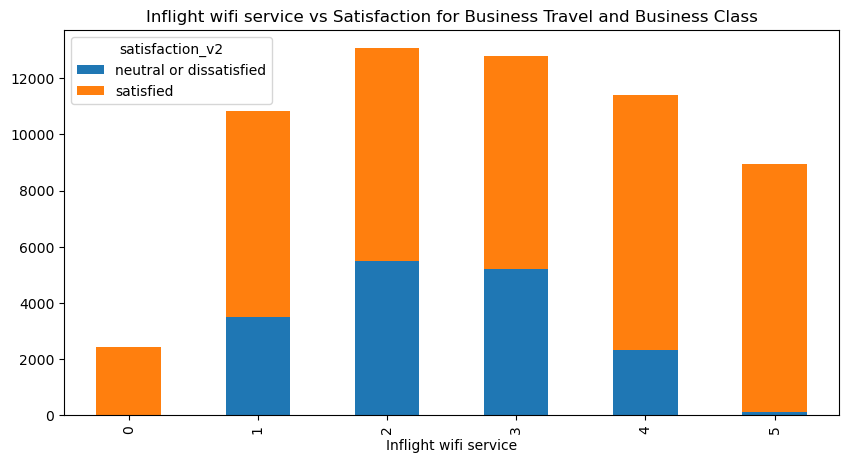

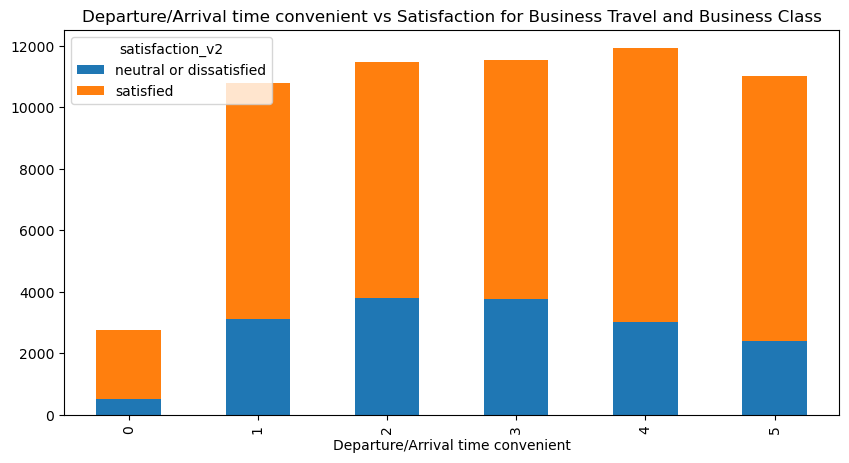

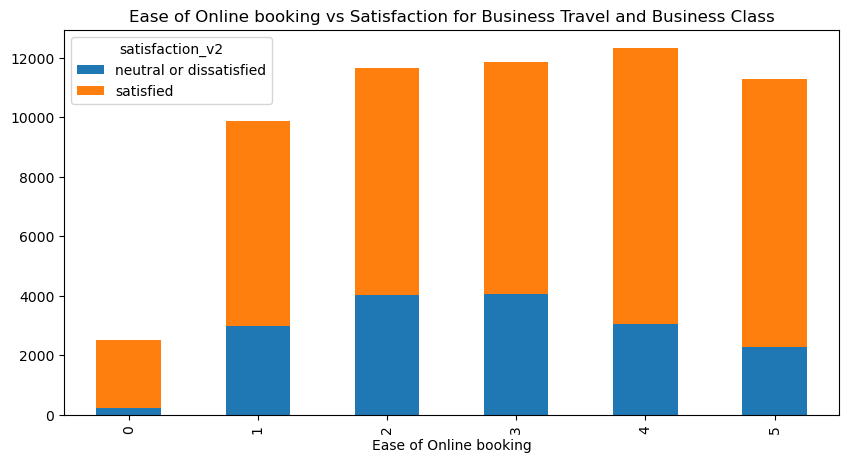

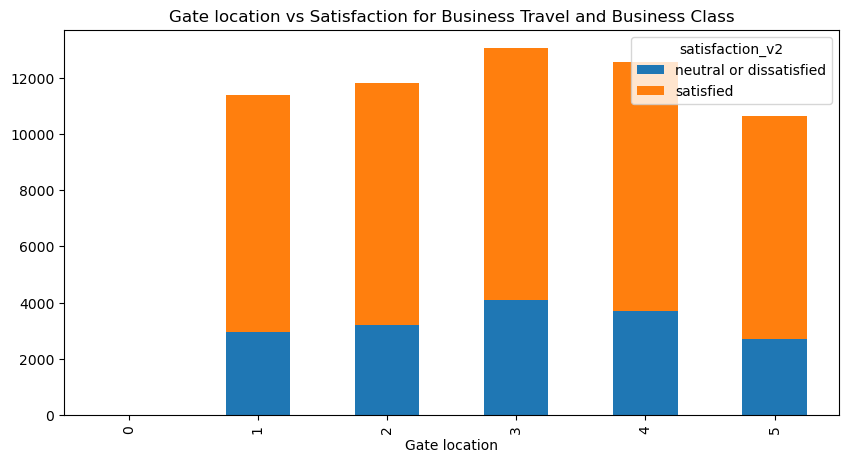

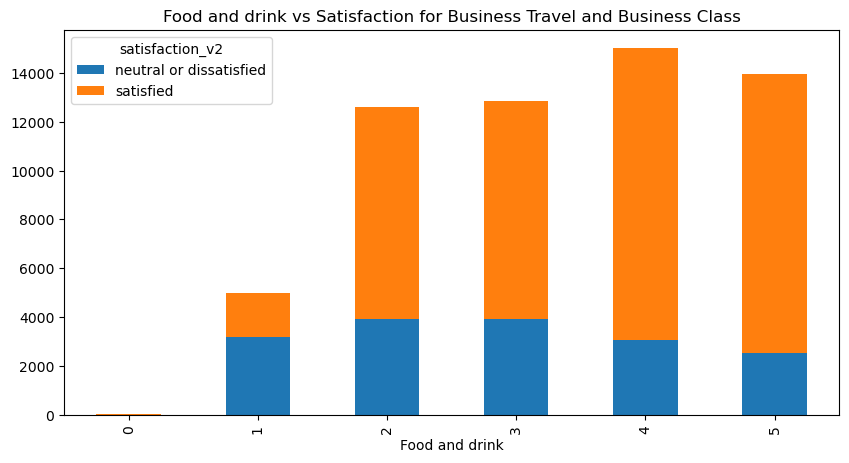

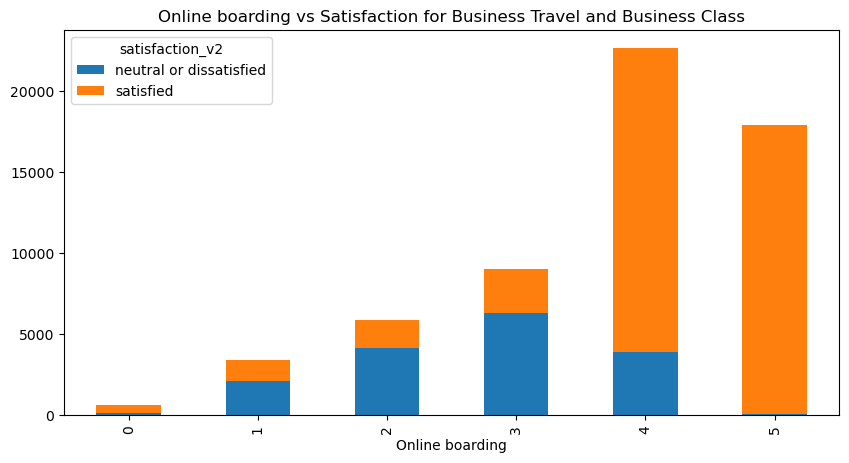

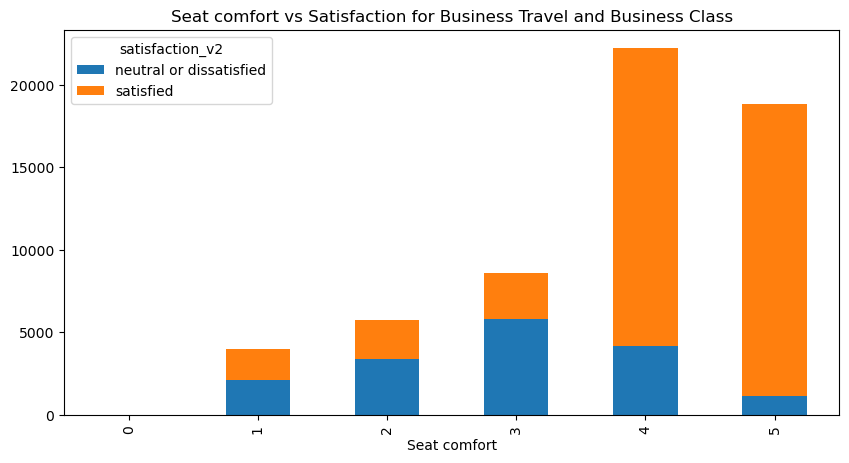

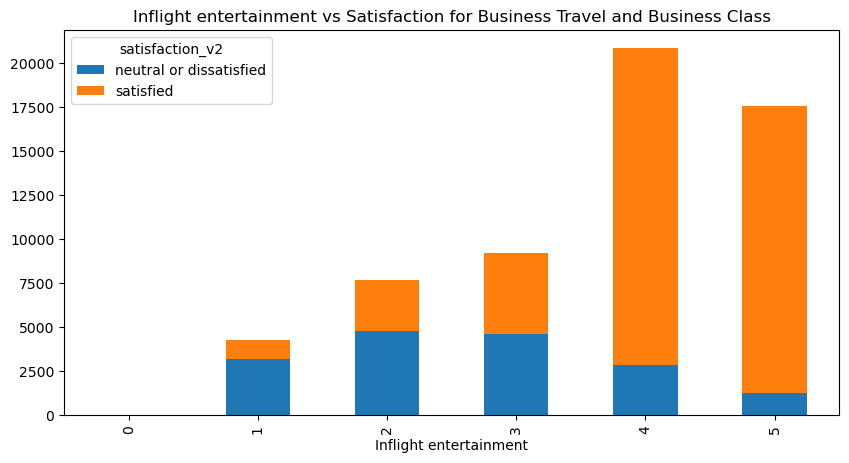

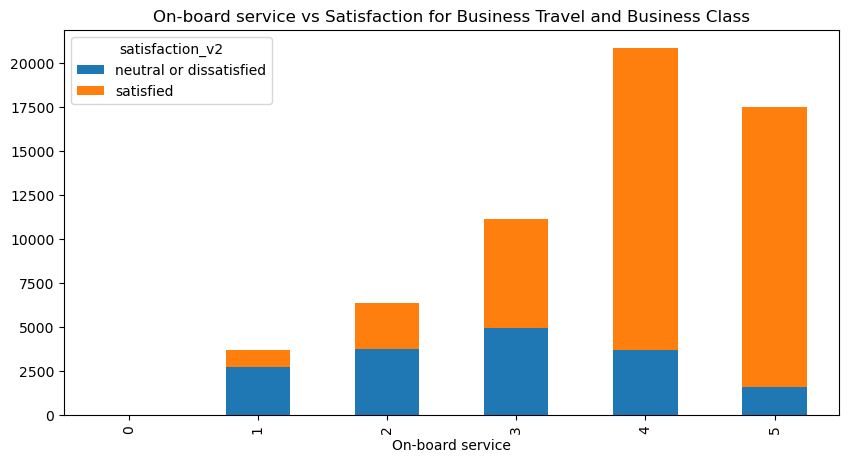

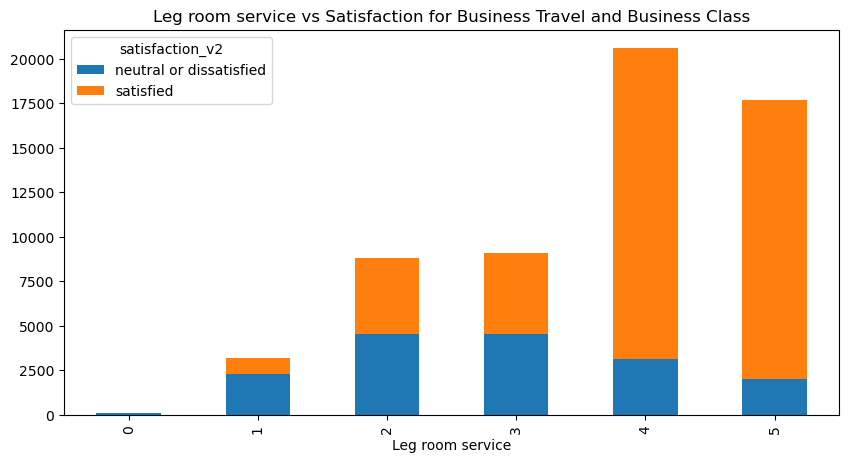

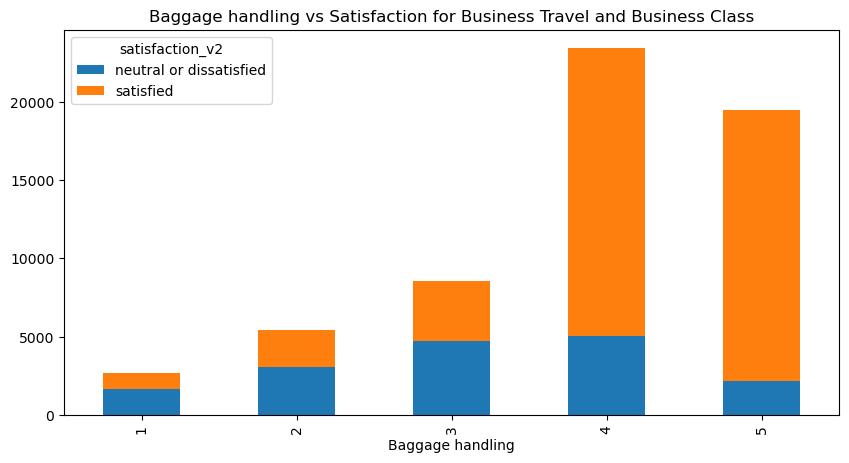

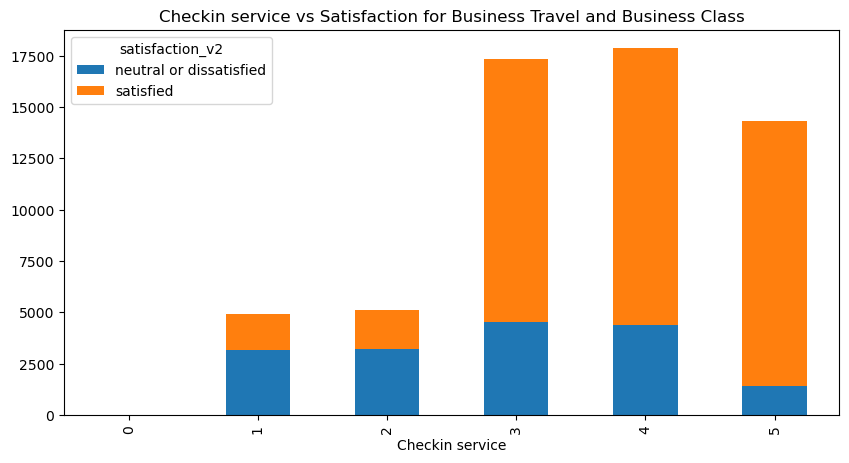

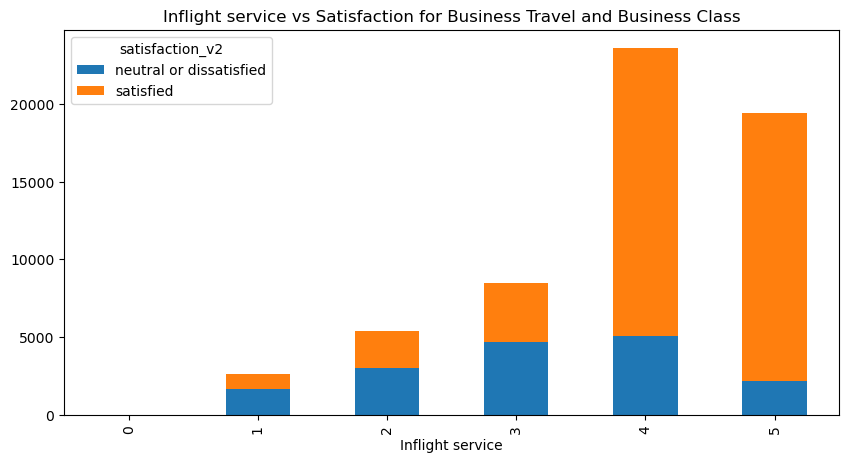

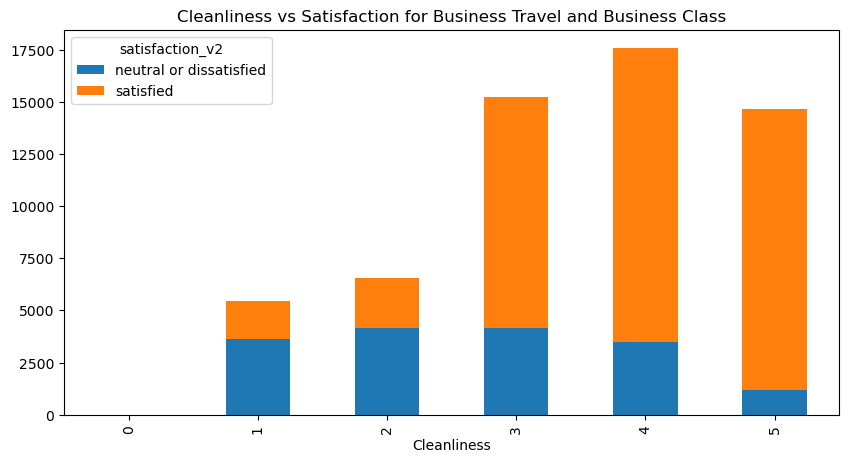

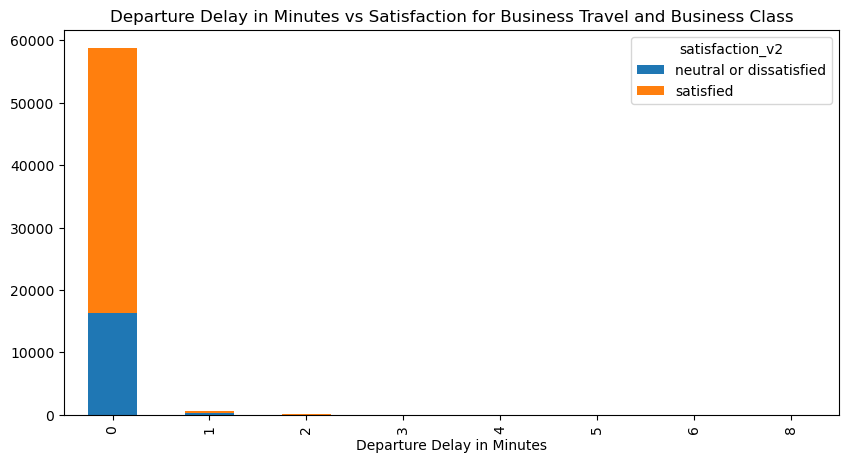

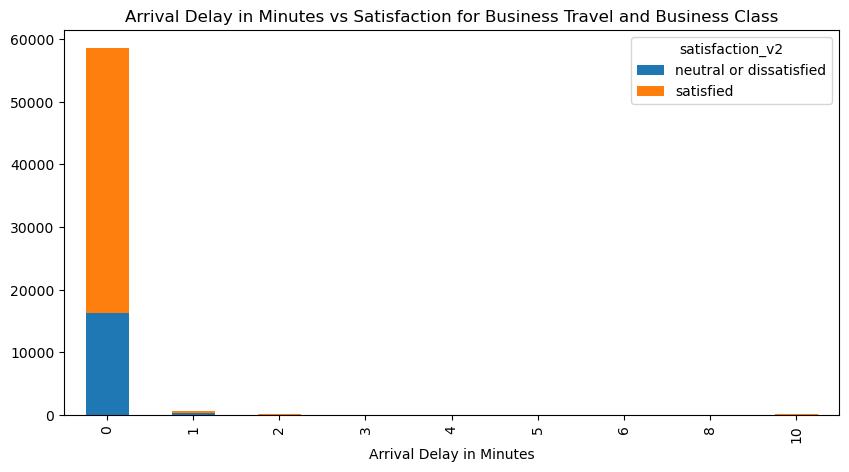

In [ ]:
# Filter rows where 'Type of Travel' is 'Business' and 'Class' is 'Business'
print(f"Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Business': {filtered2_df.shape[0]}")
# Iterate over each column in the filtered DataFrame
for column in filtered2_df.columns:
    # Exclude 'Type of Travel' and 'Class' from the comparison
    if column not in ['Type of Travel', 'Class']:
        # Create cross-tabulation between the current column and 'satisfaction_v2'
        cross_tab = pd.crosstab(filtered2_df[column], filtered2_df['satisfaction_v2'])

        # Create a stacked bar plot
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.title(f"{column} vs Satisfaction for Business Travel and Business Class")
        plt.show()

Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' & 'Eco Plus': 30206


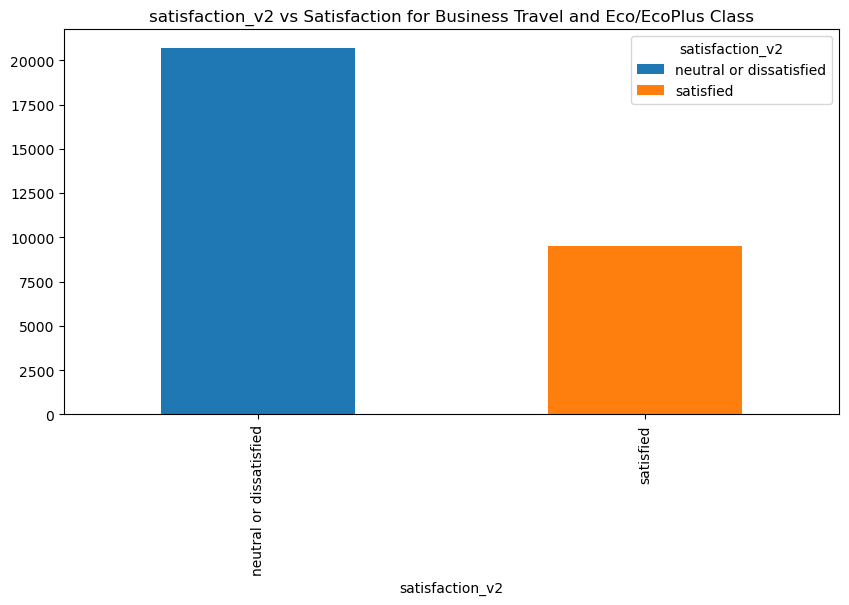

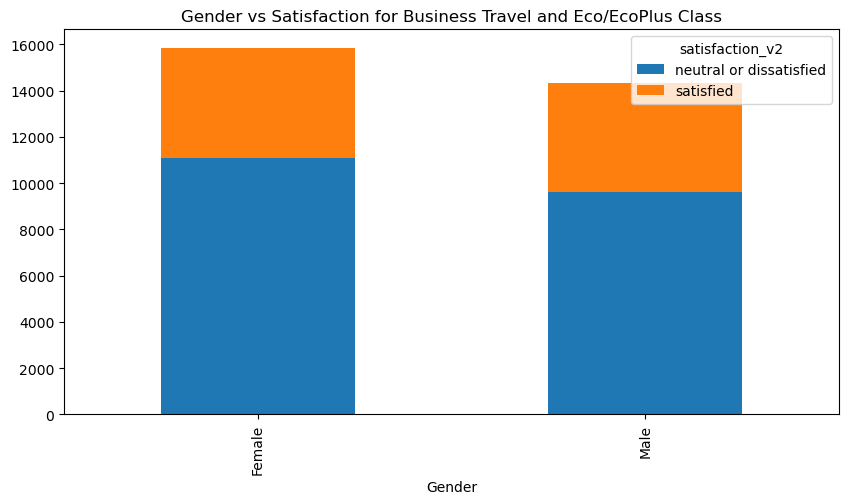

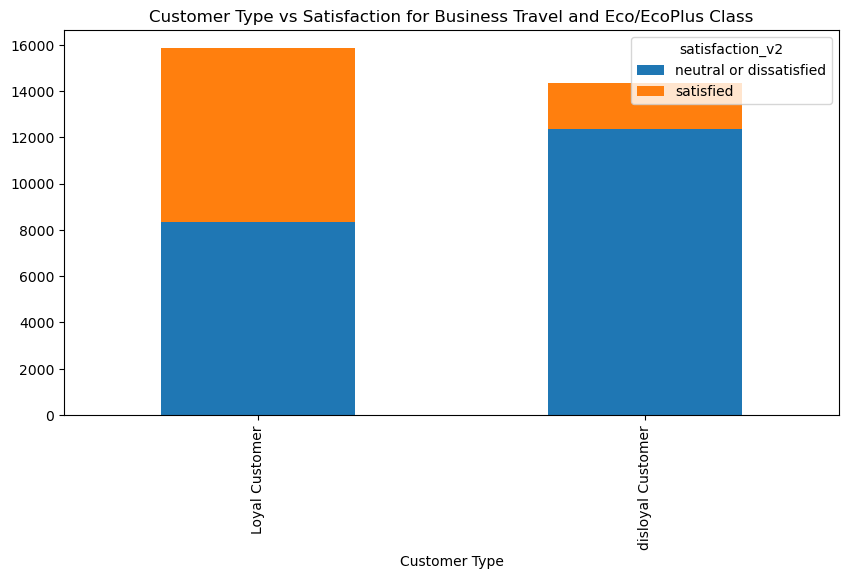

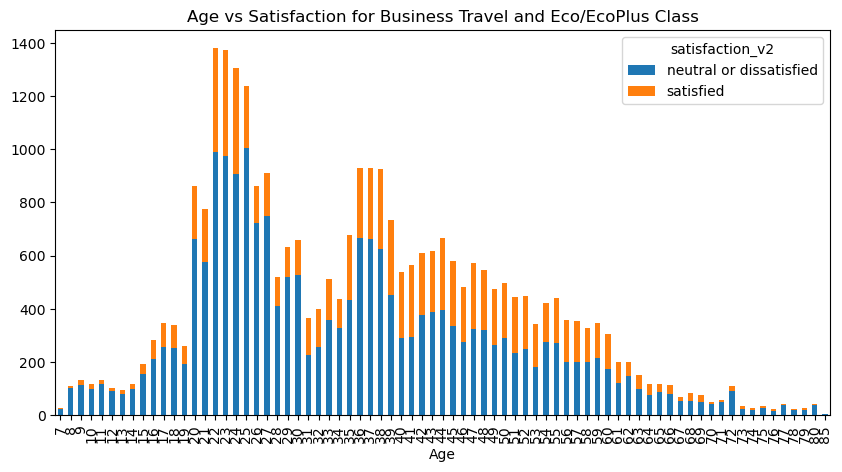

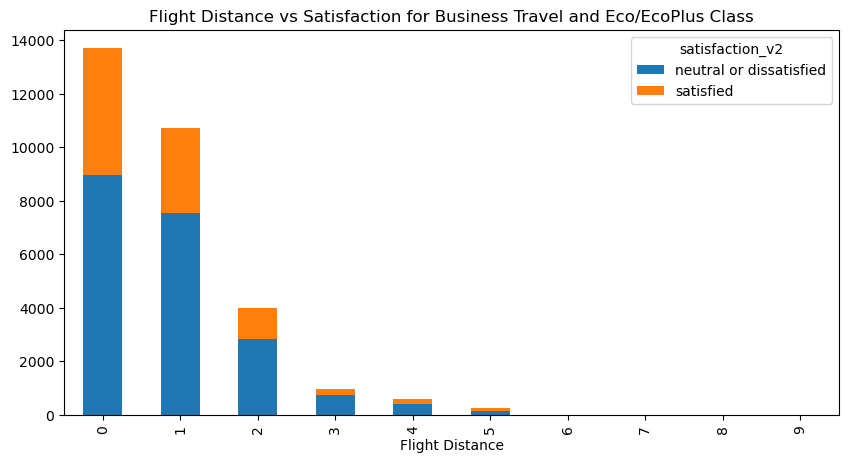

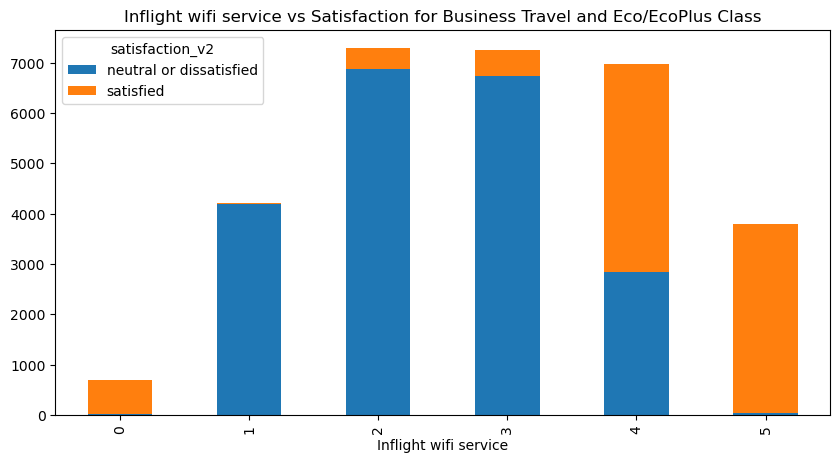

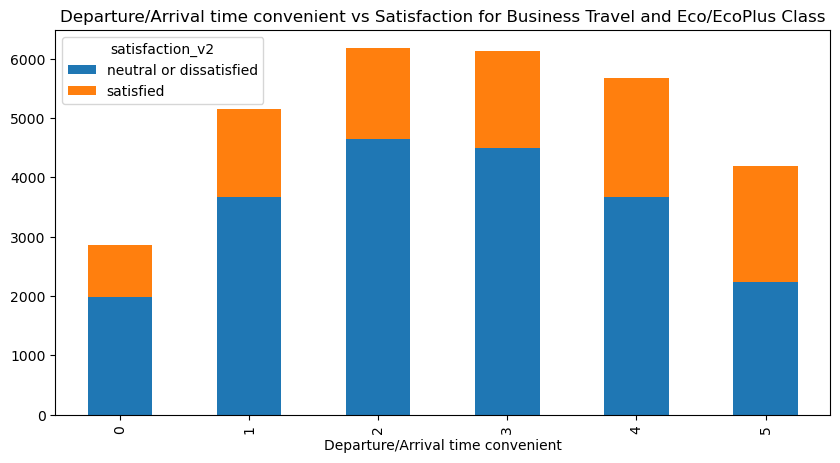

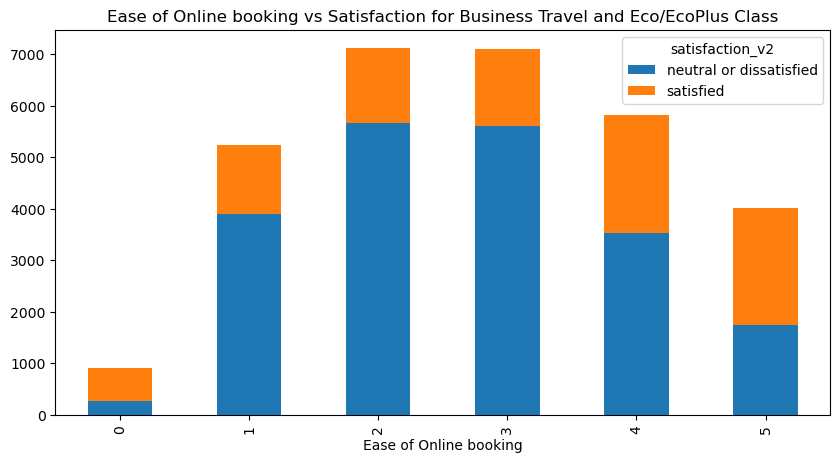

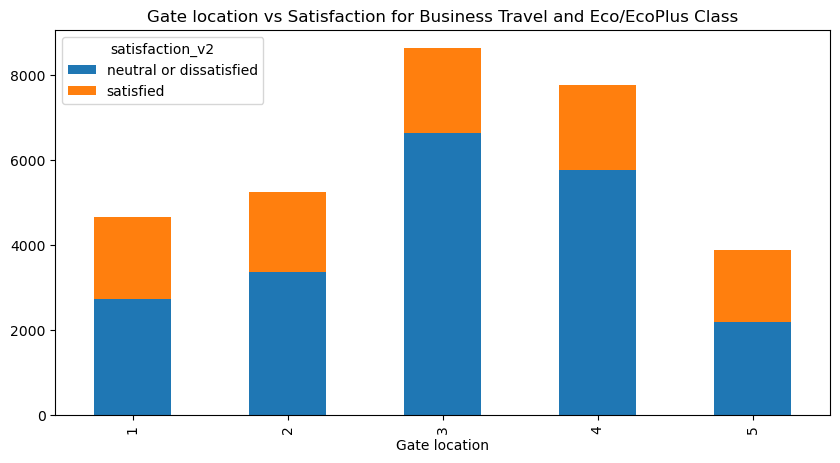

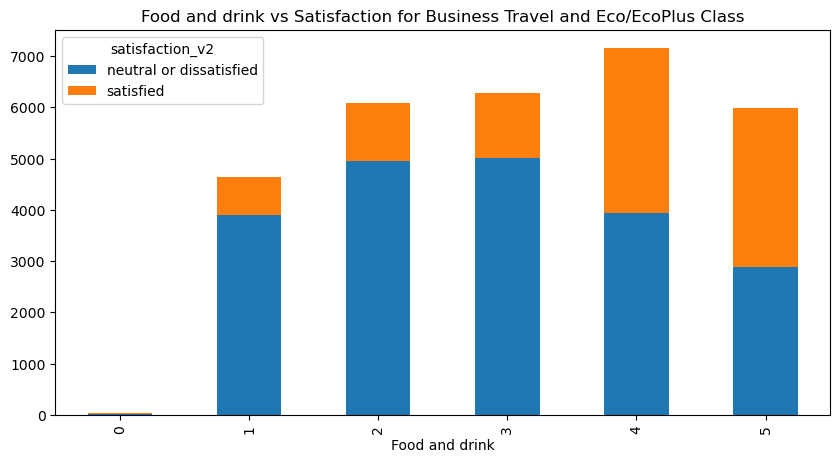

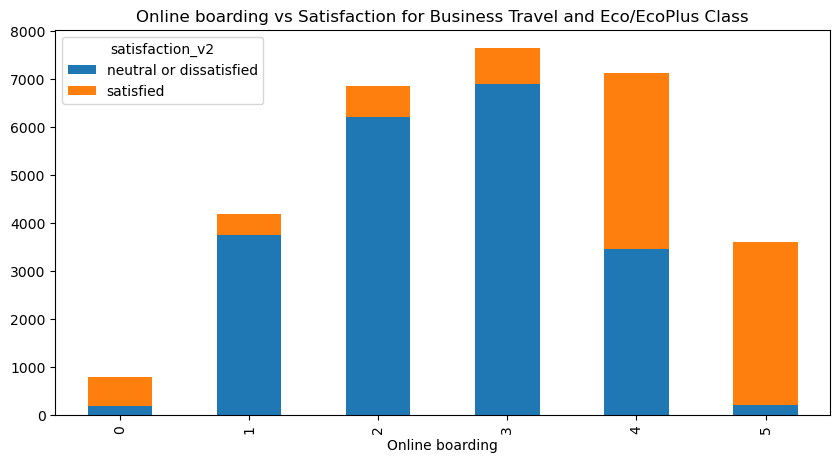

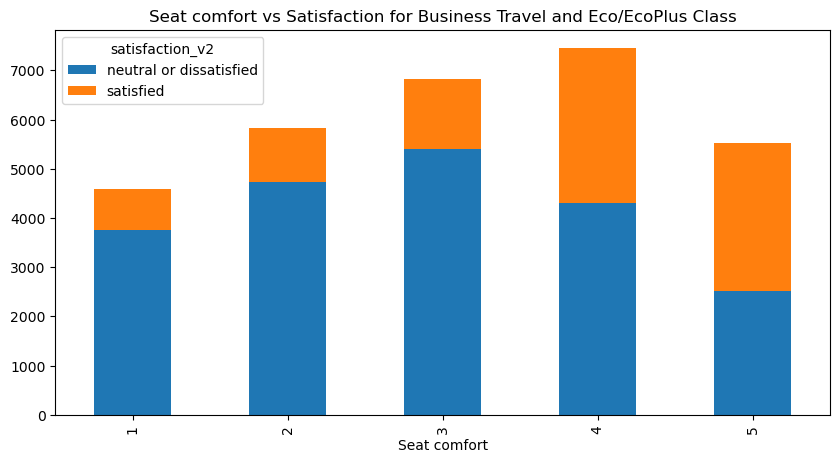

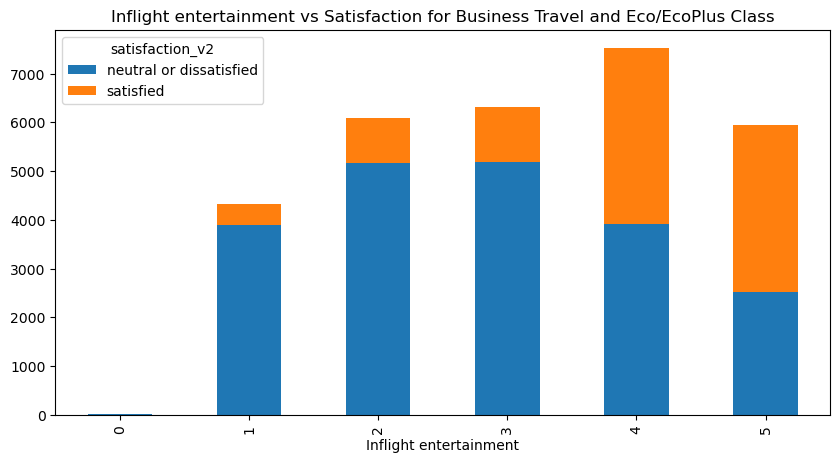

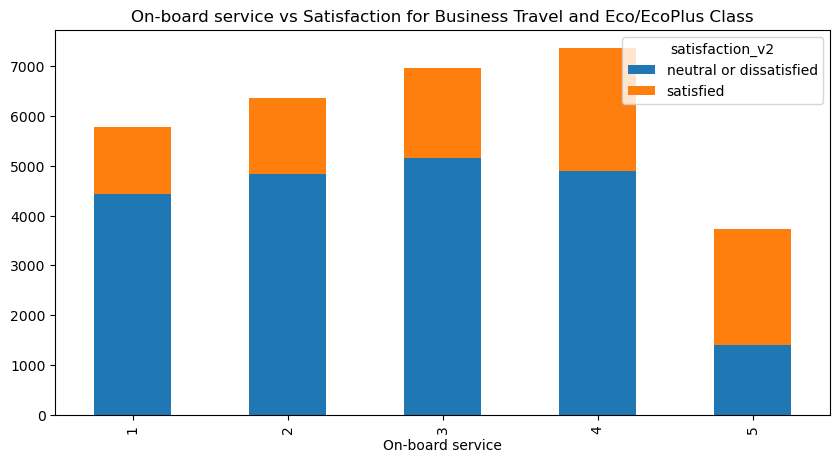

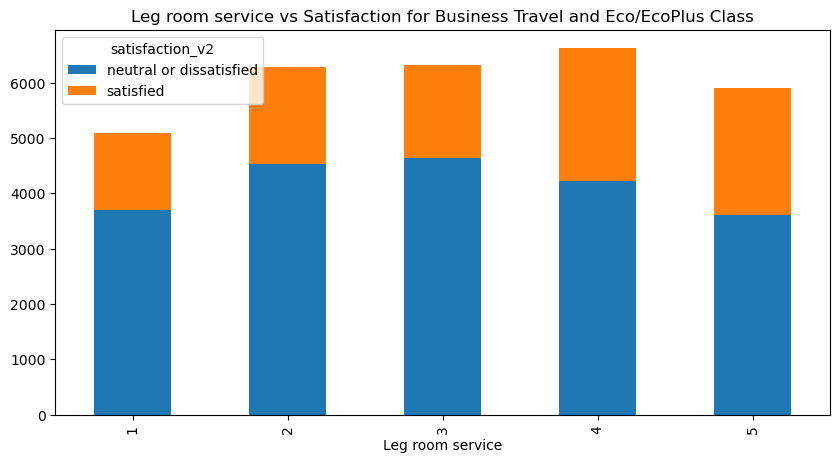

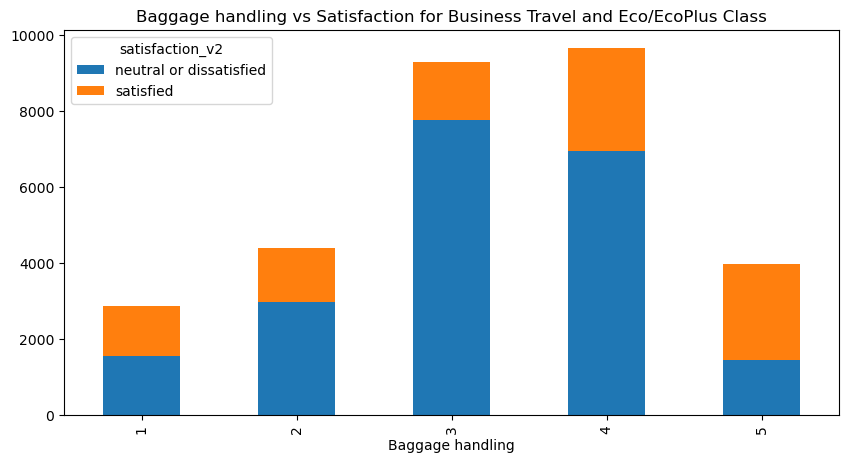

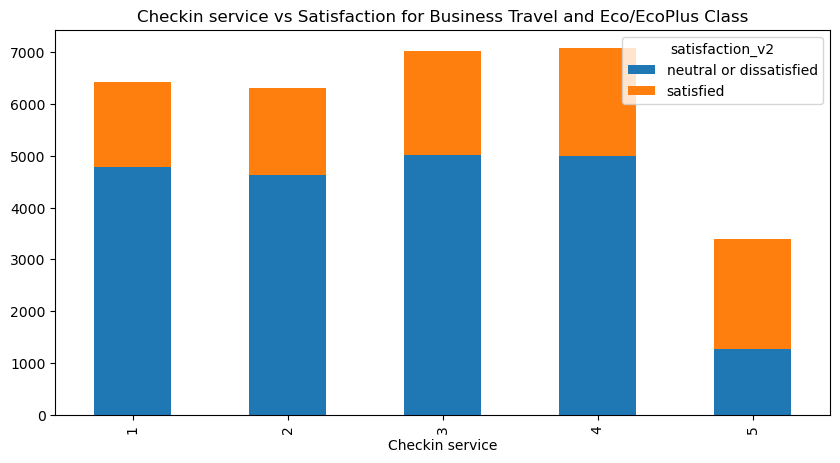

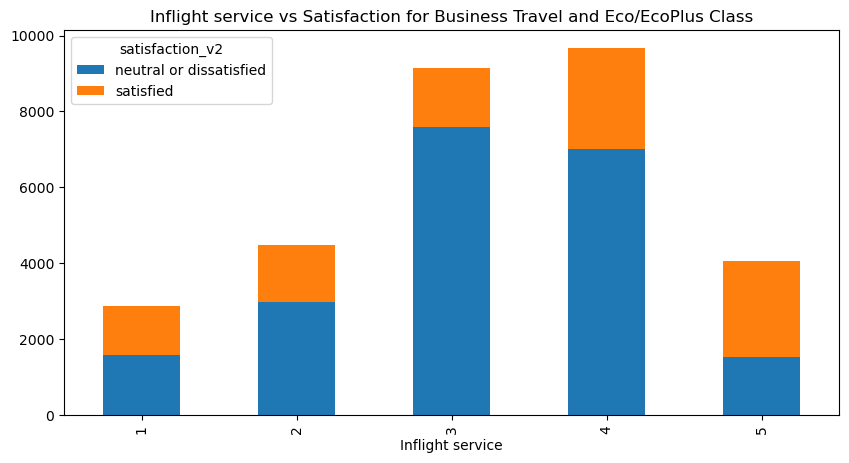

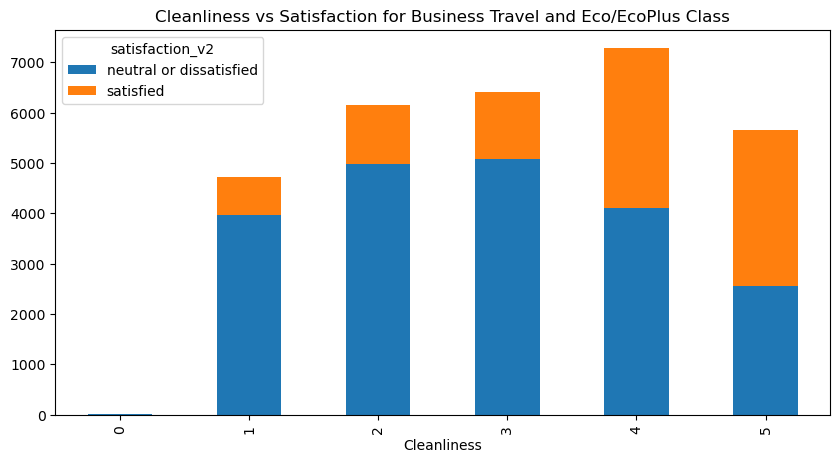

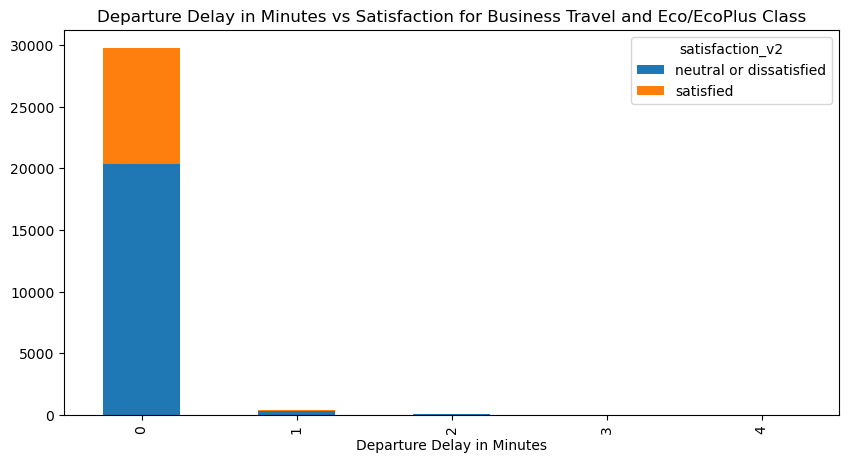

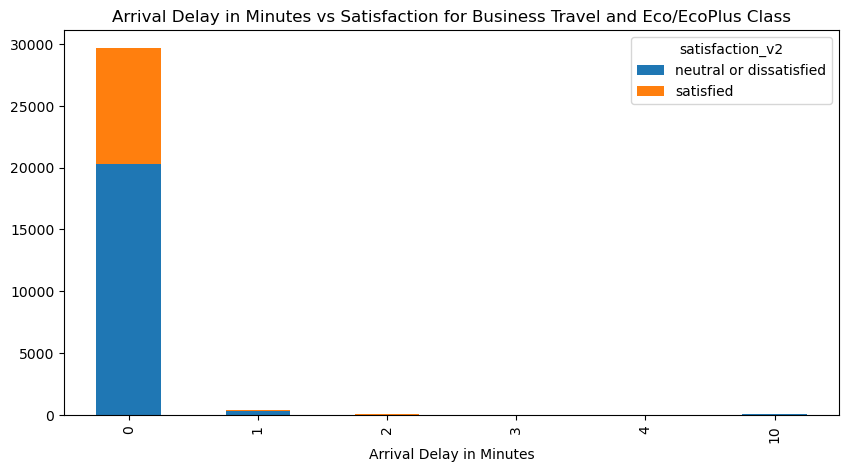

In [ ]:
# Filter rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' & 'Eco Plus'
filtered_df = df_original[(df['Type of Travel'] == 0) & (df['Class'].isin([1,2]))]
print(f"Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' & 'Eco Plus': {filtered_df.shape[0]}")
# Iterate over each column in the filtered DataFrame
for column in filtered_df.columns:
    # Exclude 'Type of Travel' and 'Class' from the comparison
    if column not in ['Type of Travel', 'Class']:
        # Create cross-tabulation between the current column and 'satisfaction_v2'
        cross_tab = pd.crosstab(filtered_df[column], filtered_df['satisfaction_v2'])

        # Create a stacked bar plot
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.title(f"{column} vs Satisfaction for Business Travel and Eco/EcoPlus Class")
        plt.show()

Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Business': 2673


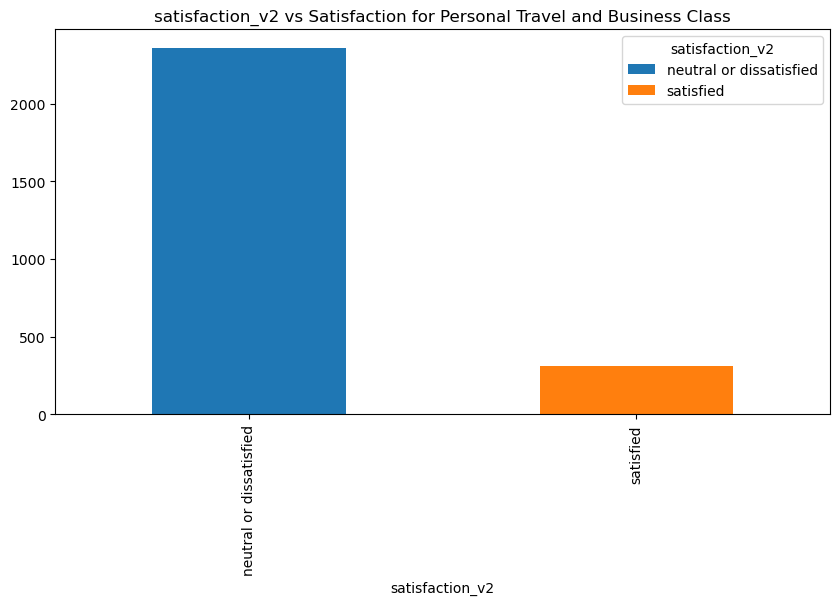

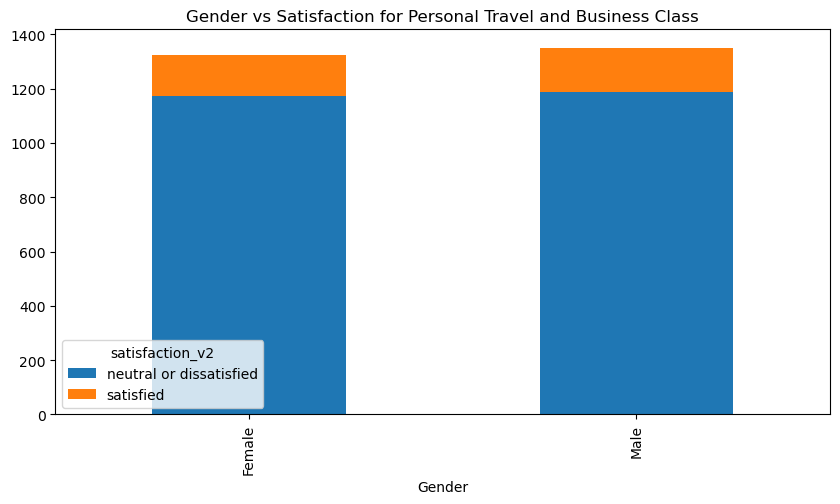

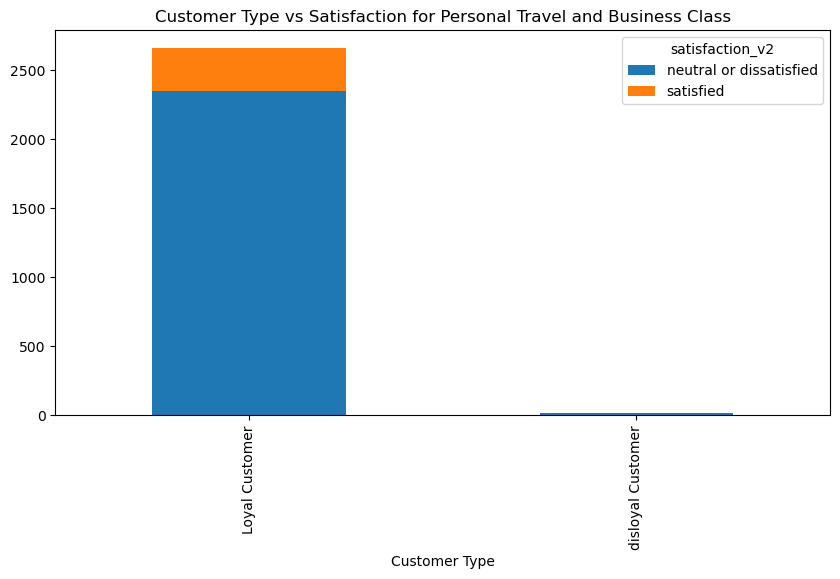

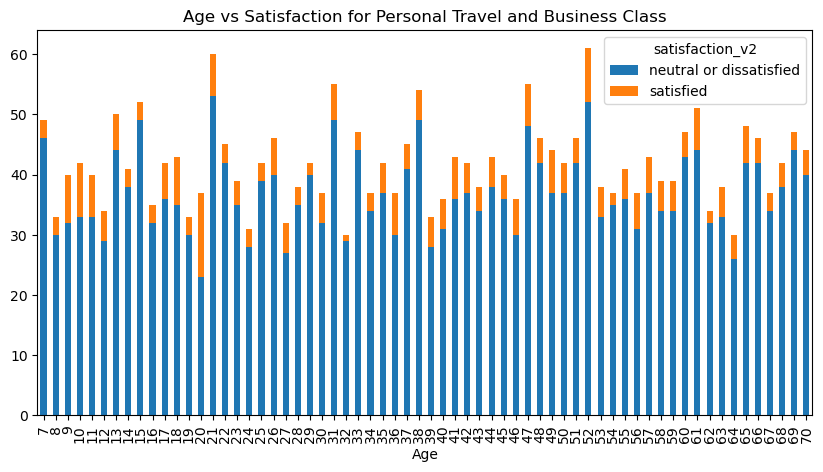

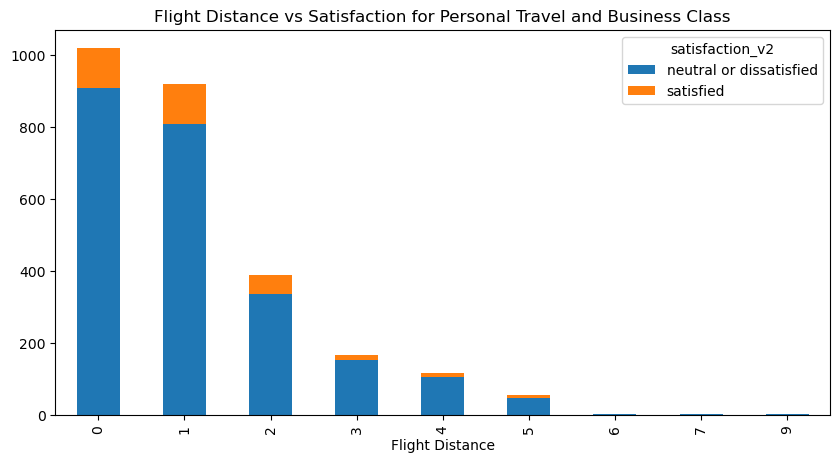

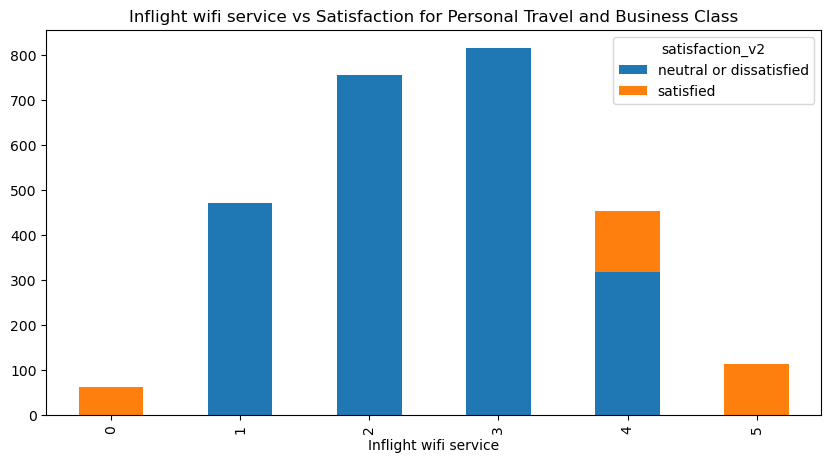

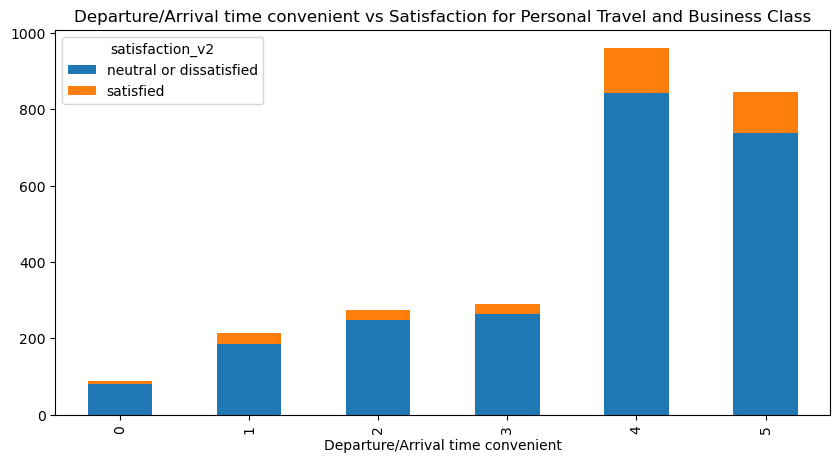

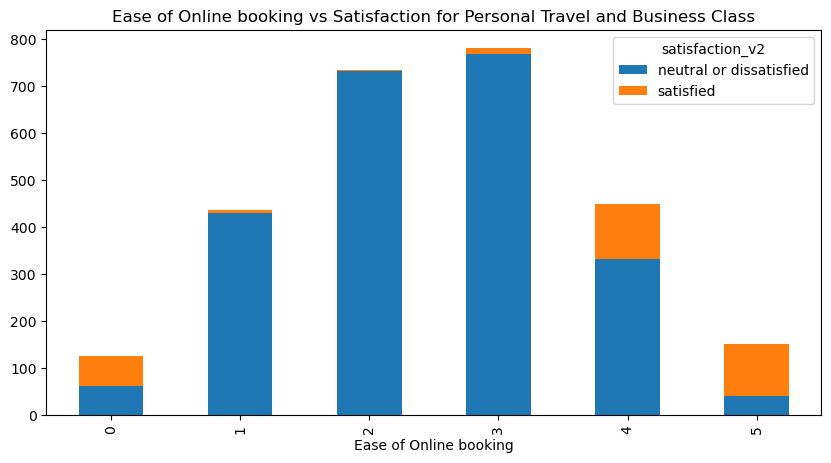

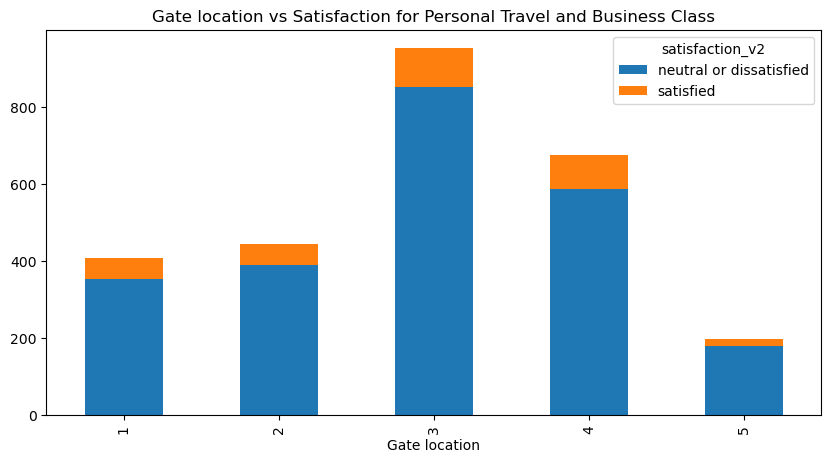

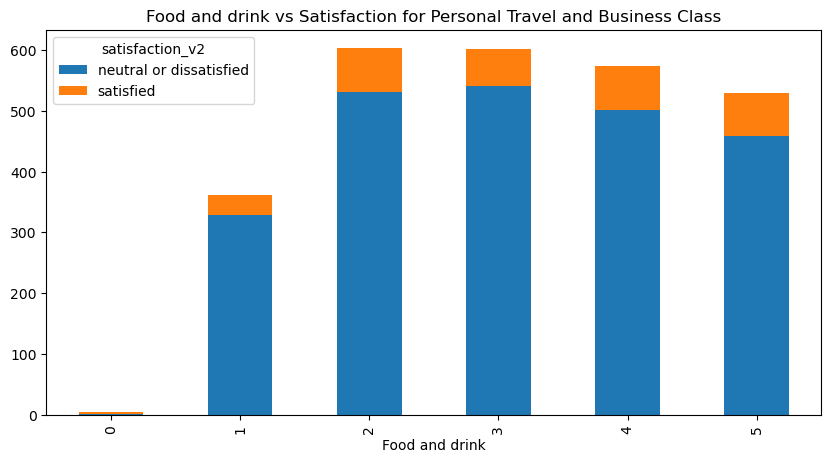

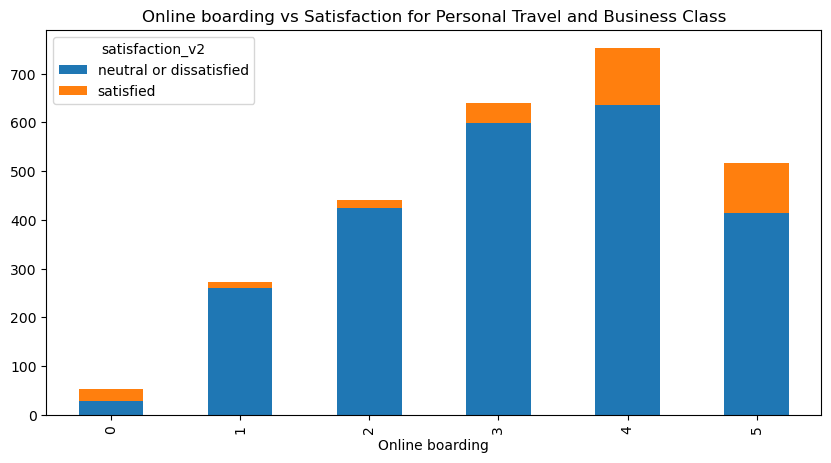

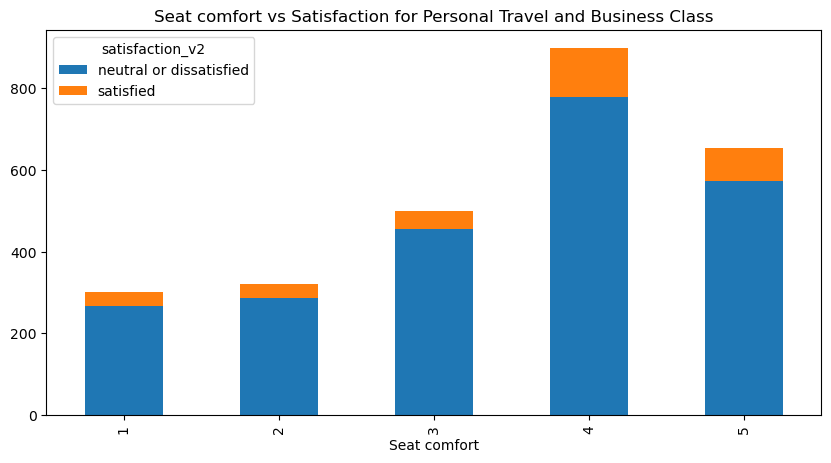

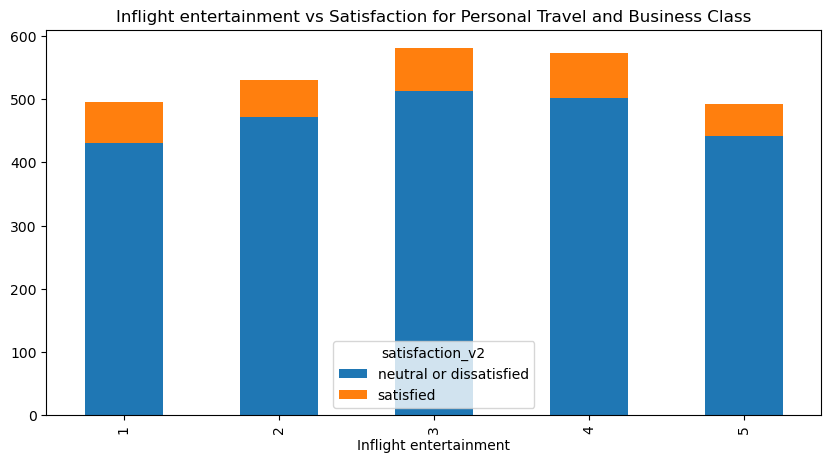

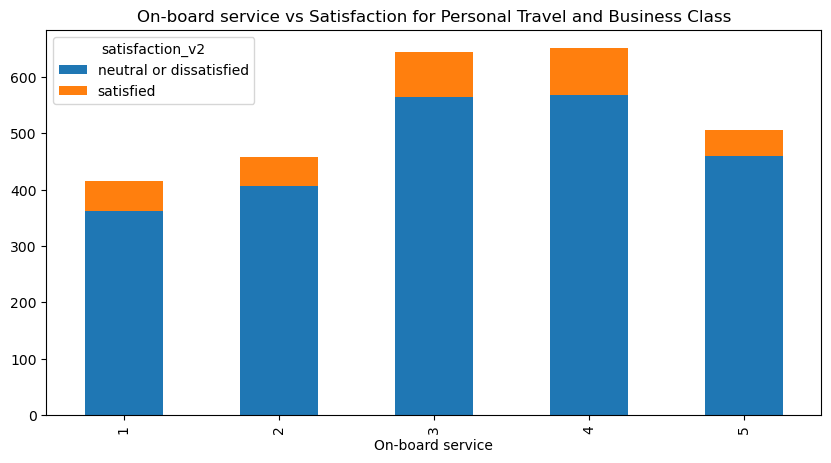

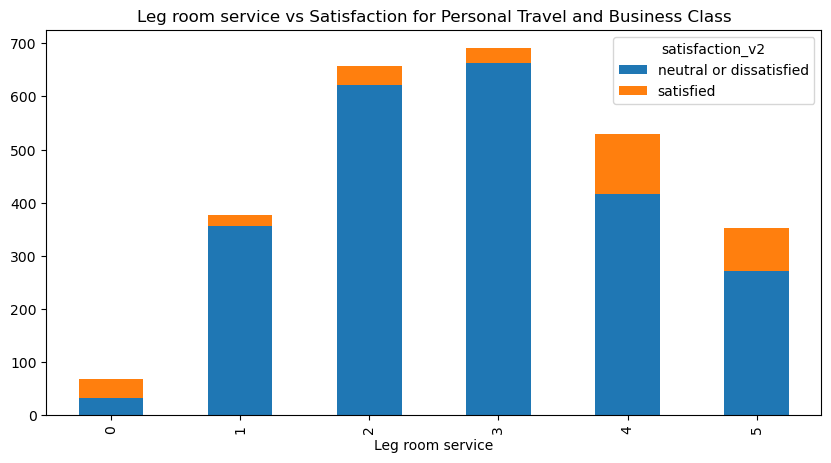

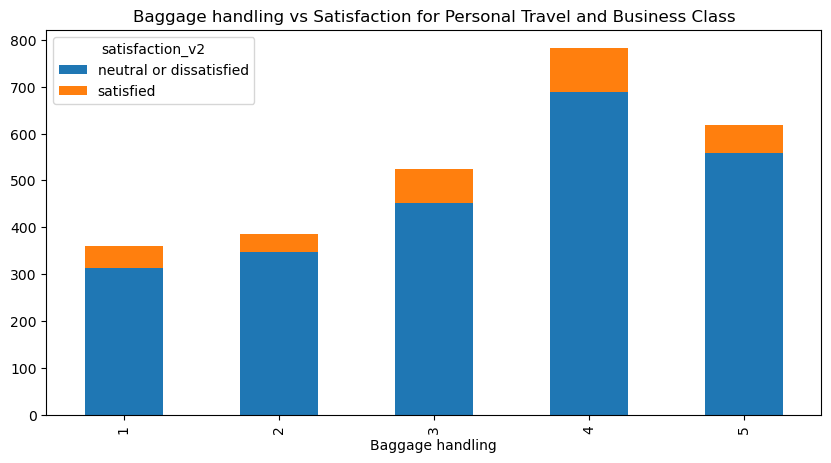

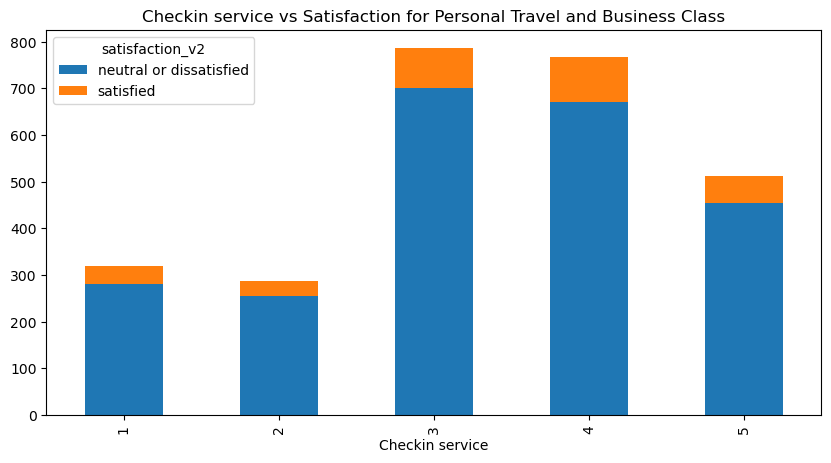

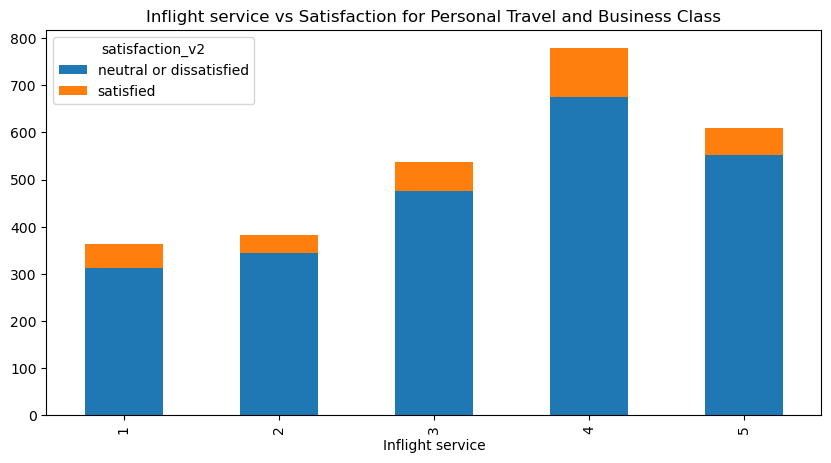

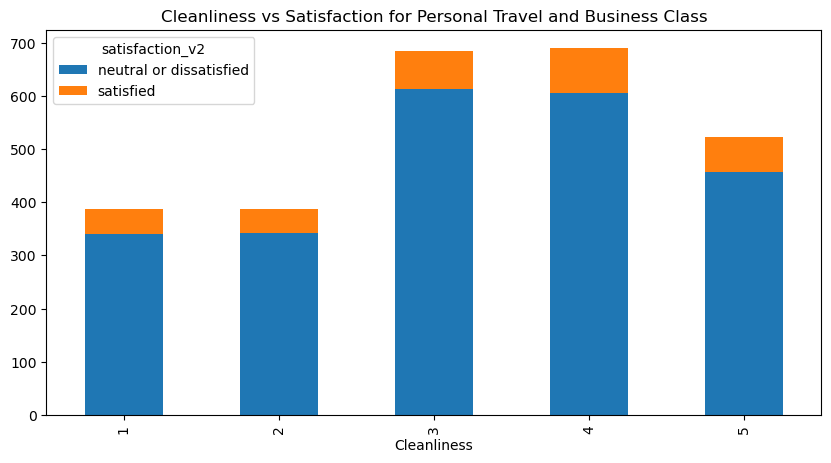

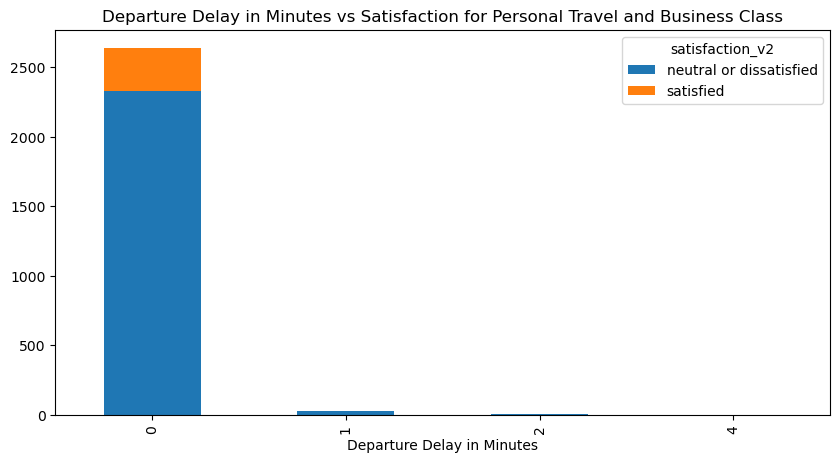

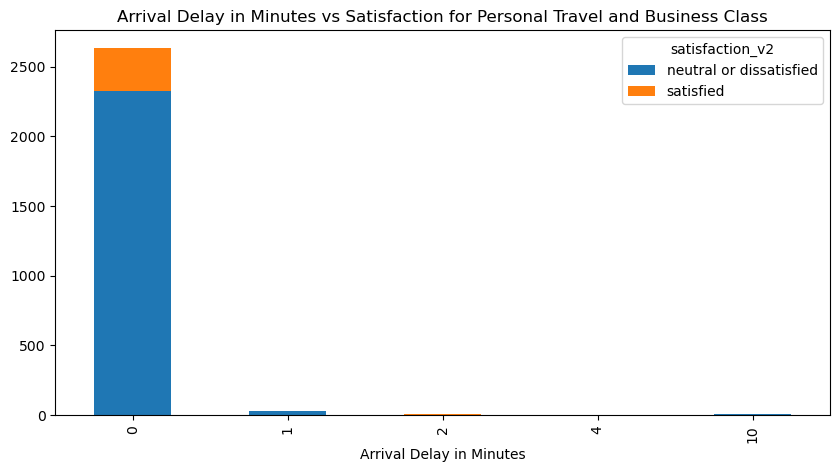

In [ ]:
# Filter rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' or 'Eco Plus'
print(f"Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Business': {filtered4_df.shape[0]}")
# Iterate over each column in the filtered DataFrame
for column in filtered4_df.columns:
    # Exclude 'Type of Travel' and 'Class' from the comparison
    if column not in ['Type of Travel', 'Class']:
        # Create cross-tabulation between the current column and 'satisfaction_v2'
        cross_tab = pd.crosstab(filtered4_df[column], filtered4_df['satisfaction_v2'])

        # Create a stacked bar plot
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.title(f"{column} vs Satisfaction for Personal Travel and Business Class")
        plt.show()

There is no clear outlier in the disastification in the three disatisfied groups. Now we take the percentages of each category and see the Satisfied vs Disatasified in a simple pie chart form.


Scenario 1: 'Type of Travel' is 'Personal' and 'Class' is in ['Eco', 'Eco Plus']

Total counts: 37514

Counts:
Dissatisfied    33755
Satisfied        3759

Percentages:
Dissatisfied    89.979741
Satisfied       10.020259


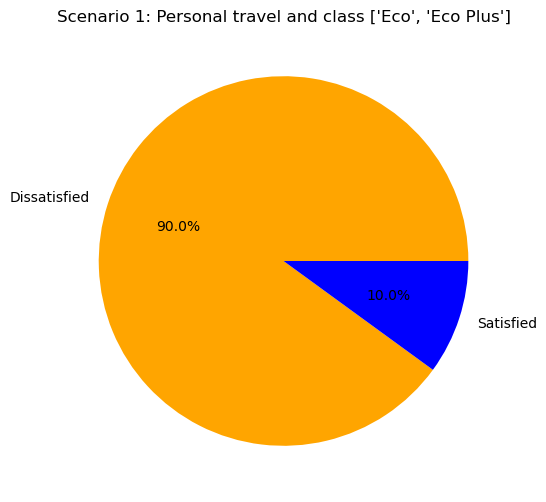


Scenario 2: 'Type of Travel' is 'Business' and 'Class' is in ['Business']

Total counts: 59487

Counts:
Satisfied       42853
Dissatisfied    16634

Percentages:
Satisfied       72.037588
Dissatisfied    27.962412


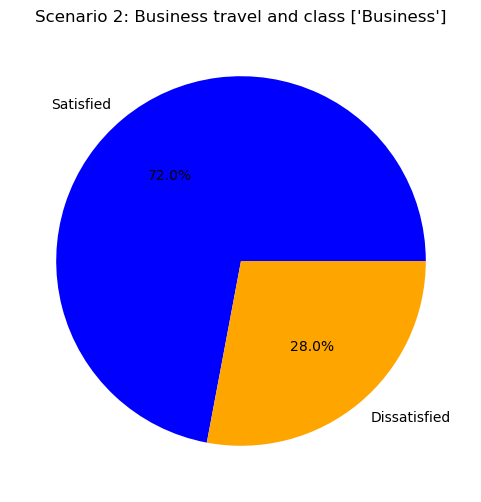


Scenario 3: 'Type of Travel' is 'Business' and 'Class' is in ['Eco', 'Eco Plus']

Total counts: 30206

Counts:
Dissatisfied    20703
Satisfied        9503

Percentages:
Dissatisfied    68.539363
Satisfied       31.460637


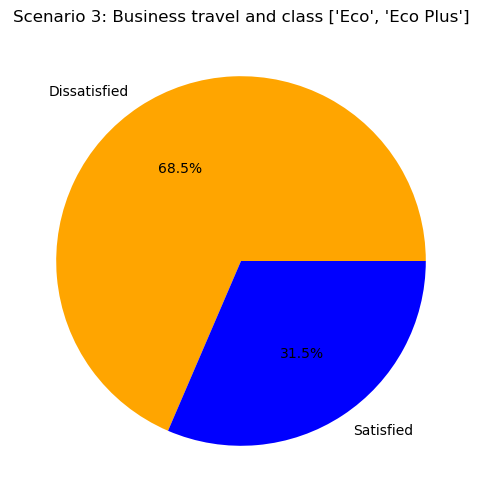


Scenario 4: 'Type of Travel' is 'Personal' and 'Class' is in ['Business']

Total counts: 2673

Counts:
Dissatisfied    2360
Satisfied        313

Percentages:
Dissatisfied    88.290311
Satisfied       11.709689


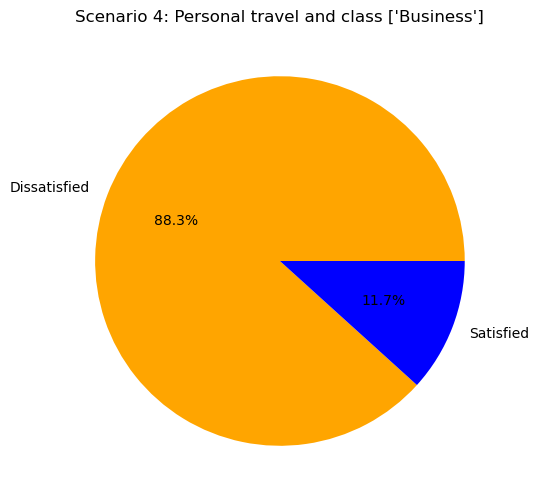

In [ ]:
# Define the scenarios
scenarios = [
    {'Type of Travel': 1, 'Class': [1, 2]},  # Personal, Eco/Eco Plus
    {'Type of Travel': 0, 'Class': [0]},     # Business, Business
    {'Type of Travel': 0, 'Class': [1, 2]},  # Business, Eco/Eco Plus
    {'Type of Travel': 1, 'Class': [0]}      # Personal, Business
]

# Define mapping dictionaries
travel_type_dict = {1: 'Personal', 0: 'Business'}
class_dict = {1: 'Eco', 2: 'Eco Plus', 0: 'Business'}
satisfaction_dict = {1: 'Satisfied', 0: 'Dissatisfied'}
color_dict = {'Satisfied': 'blue', 'Dissatisfied': 'orange'}  # Define a color dictionary

# For each scenario, filter the DataFrame, calculate the percentages and counts, and create a pie chart
for i, scenario in enumerate(scenarios, 1):
    # Filter the DataFrame
    filtered_df = df[(df['Type of Travel'] == scenario['Type of Travel']) & df['Class'].isin(scenario['Class'])]
    
    # Calculate the percentages and map to 'Satisfied' and 'Dissatisfied'
    percentages = filtered_df['satisfaction_v2'].value_counts(normalize=True).rename(satisfaction_dict) * 100
    
    # Calculate the counts and map to 'Satisfied' and 'Dissatisfied'
    counts = filtered_df['satisfaction_v2'].value_counts().rename(satisfaction_dict)
    
    # Print the counts and percentages
    print(f"\nScenario {i}: 'Type of Travel' is '{travel_type_dict[scenario['Type of Travel']]}' and 'Class' is in {[class_dict[i] for i in scenario['Class']]}")
    print(f"\nTotal counts: {counts.sum()}")
    print("\nCounts:")
    print("\n".join(str(counts).split("\n")[:-1]))  # Remove the last line (dtype) from the print
    print("\nPercentages:")
    print("\n".join(str(percentages).split("\n")[:-1]))  # Remove the last line (dtype) from the print
    
    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=[color_dict[key] for key in percentages.index])
    plt.title(f"Scenario {i}: {travel_type_dict[scenario['Type of Travel']]} travel and class {[class_dict[i] for i in scenario['Class']]}")
    plt.show()

As it shows, When the the type of Travel is Personal, or the Class is Eco/Eco Plus; There is an overwhelming majority of disatisfaction amongst the customers. To go more into depth we require the use of T-SNE in order to determine how easily the two values of Satisfaction can be seperated.

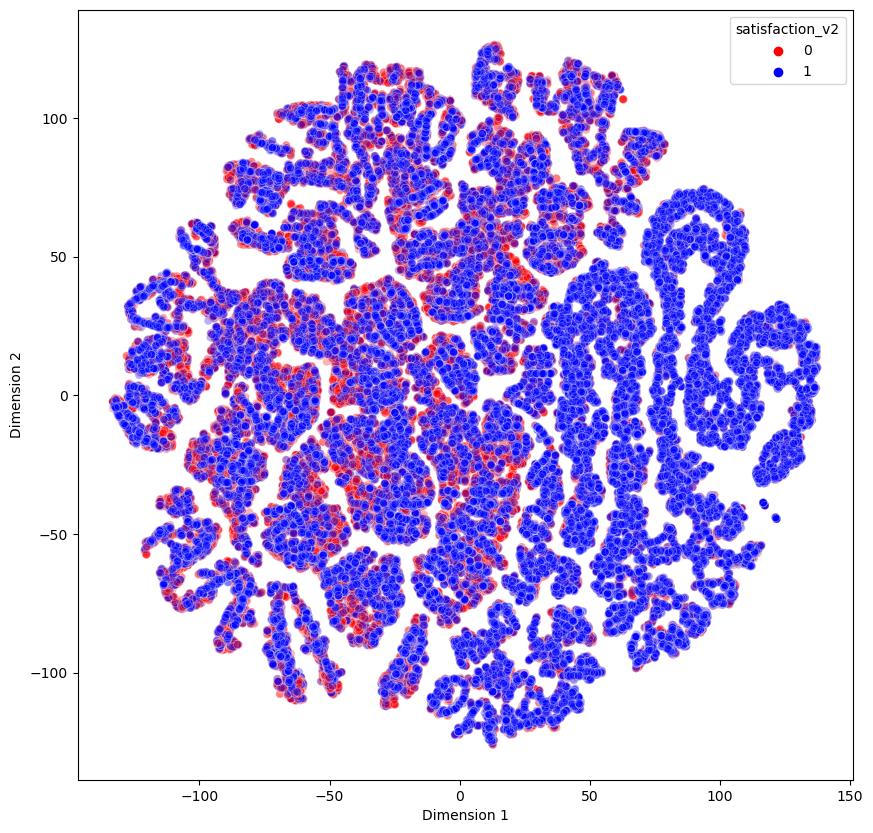

In [ ]:
from sklearn.manifold import TSNE
# Drop the target column and fit a TSNE model to the data
data = df.drop('satisfaction_v2', axis=1)
tsne = TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(data)

# Prepare the data for a seaborn scatterplot
tsne_df = pd.DataFrame(data=transformed_data, columns=['Dimension 1', 'Dimension 2'])
tsne_df = pd.concat([tsne_df, df['satisfaction_v2']], axis=1)

# Create the scatterplot, with coloring based on 'satisfaction_v2'
plt.figure(figsize=(10,10))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='satisfaction_v2', 
                palette=['red', 'blue'], data=tsne_df, legend="full", alpha=0.3)

plt.show()

Because T-SNE shows you cannot easily seperate the Satisfaction [1] vs Disatisfaction [0]. The best strategy moving foward is to go directly to binary categorization models. Theres no point in trying PCA as there is not a clear seperation that allows ease of seperation of the two values for satisfaction.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Split the dataset into training and testing sets
X = df.drop('satisfaction_v2', axis=1)
y = df['satisfaction_v2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Create classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

# Train and evaluate classifiers using cross-validation
best_mean_accuracy = 0
best_standard_deviation = 0
best_classifier = None
best_classifier_name = None
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    standard_deviation = np.std(cv_scores)
    if mean_accuracy > best_mean_accuracy:
        best_classifier = clf
        best_classifier_name = name
        best_mean_accuracy = mean_accuracy
        best_standard_deviation = standard_deviation
    print(f'{name} - Mean accuracy: {mean_accuracy:.4f}, Std: {standard_deviation:.4f}')

# Train the best performing classifier on the full training set and evaluate on the test set
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)

print(f'\nBest classifier: {best_classifier_name}')
print(f'Test accuracy: {accuracy_score(y_test, y_pred):.4f}')


Logistic Regression - Mean accuracy: 0.8746, Std: 0.0016
Decision Tree - Mean accuracy: 0.9452, Std: 0.0009
Random Forest - Mean accuracy: 0.9620, Std: 0.0005
Support Vector Machine - Mean accuracy: 0.9542, Std: 0.0011
k-Nearest Neighbors - Mean accuracy: 0.9285, Std: 0.0024
Neural Network - Mean accuracy: 0.9569, Std: 0.0016
XGBoost - Mean accuracy: 0.9630, Std: 0.0009
LightGBM - Mean accuracy: 0.9638, Std: 0.0013

Best classifier: LightGBM
Test accuracy: 0.9632


Best Classifier: LightGBM - Test Set Performance:
Accuracy: 0.9632352941176471
Confusion Matrix:
 [[14333   315]
 [  640 10688]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14648
           1       0.97      0.94      0.96     11328

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Optimal threshold using F1 score: 0.52
                  features  importances
6    Inflight wifi service          530
2                      Age          249
1            Customer Type          209
3           Type of Travel          176
11         Online boarding          174
16        Baggage handling          165
4                    Class          161
12            Seat comfort          156
13  Inflight entertainment          150
18        Inflight service          147


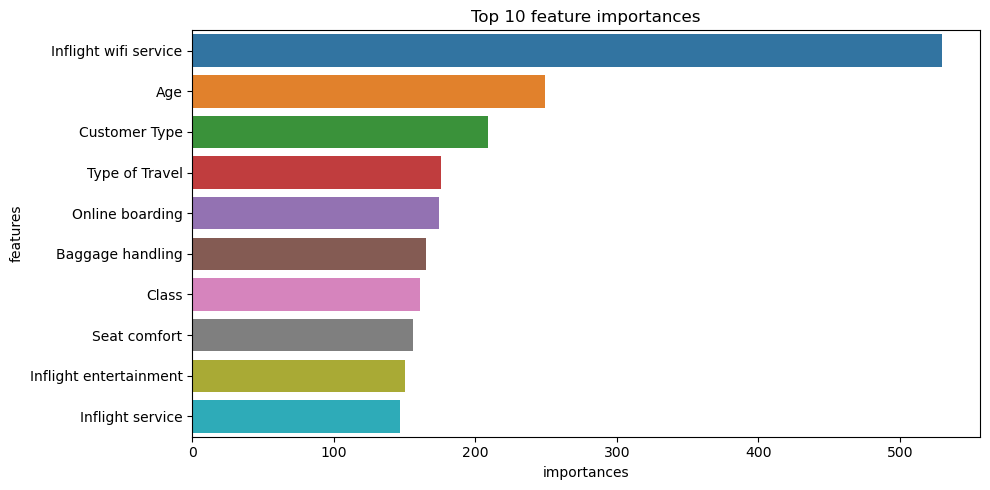

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
from sklearn.metrics import f1_score

# Print evaluation metrics
print(f'Best Classifier: {best_classifier_name} - Test Set Performance:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Define LightGBM model
model = lgb.LGBMClassifier()

# Fit model
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Initialize a list to store F1 scores
f1_scores = []

# Iterate through a range of possible threshold values and calculate the F1 score for each
thresholds = np.arange(0, 1.01, 0.01)
for threshold in thresholds:
    y_pred = (y_pred_probs > threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Find the optimal threshold with the highest F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]
print("Optimal threshold using F1 score:", optimal_threshold)

# Get feature importances from the LightGBM model
importances = model.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'features': X_train.columns, 'importances': importances})

# Sort by importances
importances_df = importances_df.sort_values('importances', ascending=False)

# Display the top 10 features and their importances
top_10_features = importances_df.head(10)
print(top_10_features)

# Plot feature importances
plt.figure(figsize=(10,5))
sns.barplot(x='importances', y='features', data=top_10_features)
plt.title('Top 10 feature importances')
plt.tight_layout()
plt.show()